In [26]:

import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Para conversión de variables categóricas en ordinales
# ------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_colwidth', None)

In [27]:
df = pd.read_csv('df_limpio_nulos_gestionados.csv', index_col = 0)
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
0,51.0,No,rarely,684.0,unknown,6,3,unknown,162.0,1,M,51.0,3,5,research director,3,unknown,6462,7,no,13,3.0,3,40.0,234444.000000,19537.000000,0,11.318934,5,3.00,20,15,15,1972,unknown,Si
1,52.0,No,rarely,699.0,unknown,1,4,Life Sciences,259.0,3,M,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3.0,1,40.0,239988.000000,19999.000000,1,34.000000,5,3.00,33,11,9,1971,unknown,Si
2,42.0,No,rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3,M,58.0,3,5,manager,4,married,4933,1,no,11,3.0,4,40.0,230784.000000,19232.000000,0,22.000000,3,2.76,22,11,15,1981,manager - research & development,Si
3,47.0,No,rarely,359.0,unknown,2,4,Medical,unknown,1,F,82.0,3,4,research director,3,married,26703,3,unknown,19,3.0,2,40.0,206028.000000,17169.000000,2,11.318934,2,2.76,20,5,6,1976,unknown,No
4,46.0,No,rarely,1319.0,unknown,3,3,Technical Degree,unknown,1,F,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3.0,4,40.0,77732.233463,6477.686122,1,11.318934,5,3.00,19,2,8,1977,unknown,No


------------------- 0. VISUALIZACIÓN DEL A/B TESTING -------------------------------------

In [28]:
# Los datos confirman que la satisfacción baja de empleados (<3) tiene que ver con la posible rotación. 
# 
# Más allá de la demostración, ¿Cómo planteamos esta visualización?

------------------- CONSECUENCIAS DEL A/B TESTING -------------------------------------

Hacemos un dataframe filtrando por satisfacción < 3 y analizamos/ hacemos un repaso por los valores estadísticos más importantes. ¿Comparamos estadísticos con el otro grupo en busca de diferencias? Cuánto más visual, mejor.

In [29]:
df_menor3 = df[df['jobsatisfaction']<3]  # Incluye extrabajadores y trabajadores actuales.

df_mayor3 = df[df['jobsatisfaction']>=3]  # Incluye extrabajadores y trabajadores actuales


In [30]:
df_menor3.describe()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth
count,619.000000,575.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.0,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,36.991922,767.826087,10.852989,2.922456,2.678514,67.660444,2.752827,2.085622,1.487884,14187.927302,2.825525,15.119548,3.158885,2.725363,40.0,77218.146376,6434.845531,0.788368,11.520950,2.827141,2.772859,7.205170,2.329564,4.376414,1986.000000
std,9.171060,412.033207,10.113564,0.977314,1.108239,19.708819,0.695783,1.115108,0.500257,7014.309091,2.574193,3.657495,0.345864,1.092273,0.0,39065.640256,3255.470021,0.846921,6.566224,1.249274,0.688989,6.282578,3.337239,3.706309,9.168858
min,18.000000,104.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2125.000000,0.000000,11.000000,3.000000,1.000000,40.0,12624.000000,1052.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1963.000000
25%,30.000000,413.500000,2.000000,2.000000,2.000000,52.000000,2.000000,1.000000,1.000000,8273.000000,1.000000,12.000000,3.000000,2.000000,40.0,58650.000000,4887.500000,0.000000,8.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1980.000000
50%,36.000000,725.000000,8.000000,3.000000,3.000000,67.000000,3.000000,2.000000,1.000000,14229.000000,2.000000,14.000000,3.000000,3.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,5.000000,1.000000,3.000000,1987.000000
75%,43.000000,1130.500000,16.000000,4.000000,4.000000,84.000000,3.000000,3.000000,2.000000,19908.000000,4.000000,18.000000,3.150000,4.000000,40.0,77732.233463,6477.686122,1.000000,11.659467,3.000000,3.000000,9.000000,3.000000,7.000000,1993.000000
max,60.000000,1499.000000,49.000000,5.000000,4.000000,100.000000,4.000000,5.000000,2.000000,26956.000000,9.000000,25.000000,4.000000,4.000000,40.0,238164.000000,19847.000000,3.000000,40.000000,6.000000,4.000000,36.000000,15.000000,17.000000,2005.000000


In [31]:
df_mayor3.describe()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth
count,995.000000,915.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.0,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,36.876382,823.614208,11.321608,2.926633,2.700503,65.012609,2.731658,2.057286,3.516583,14344.571859,2.578894,15.193970,3.145628,2.691457,40.0,78052.052465,6504.337705,0.792965,11.193258,2.798995,2.751437,7.087437,2.193970,4.123618,1986.123618
std,9.063369,396.339566,10.655908,1.049885,1.108205,19.559947,0.721440,1.093117,0.499976,7172.406500,2.459441,3.644621,0.329217,1.071056,0.0,39810.021453,3317.501788,0.839991,6.201358,1.327544,0.672425,6.026383,3.171421,3.468715,9.063369
min,18.000000,103.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,3.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,40.0,12108.000000,1009.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1963.000000
25%,30.000000,511.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,3.000000,7911.500000,1.000000,12.000000,3.000000,2.000000,40.0,62460.000000,5205.000000,0.000000,8.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1980.000000
50%,35.000000,827.000000,8.000000,3.000000,3.000000,66.000000,3.000000,2.000000,4.000000,14284.000000,1.000000,14.000000,3.000000,3.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,5.000000,1.000000,3.000000,1988.000000
75%,43.000000,1178.500000,18.000000,4.000000,4.000000,81.000000,3.000000,3.000000,4.000000,20464.500000,4.000000,18.000000,3.150000,4.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,10.000000,3.000000,7.000000,1993.000000
max,60.000000,1498.000000,49.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.0,239988.000000,19999.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,17.000000,2005.000000


Numéricamente no se intuyen grandes diferencias, salvo en dailyrate. Comparamos visuamente ambos grupos.

In [32]:
def comparar_variables_numericas (df_izquierda, df_derecha, variable):

    # Recibe dos dataframes y una variable. La función grafica la variable entre los dos grupos analizando.
    # Mostramos la densidad en lugar de la frecuencia para que el tamaño distinto de las diferentes muestras no lleve a equívoco 

    # Ordenamos los dataframes 
    df_i = df_izquierda.sort_values(by = variable, ascending = False)
    df_d = df_derecha.sort_values(by = variable, ascending = False)

    # Crear la figura y el eje 
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5)) 

    sns.histplot(x = variable, 
            data = df_i, 
            color = "orange", 
            stat = 'density', 
            kde = True, 
            bins = 20,
            ax = axes[0]);
    
    sns.histplot(x = variable, 
            data = df_d, 
            color = "blue", 
            kde = True, 
            stat = 'density', 
            bins = 20,
            ax = axes[1])

    # Añadimos título 
    axes[0].set_title(f"Distribución de la variable {variable} en grupos con satisfacción <3")
    axes[1].set_title(f"Distribución de la variable {variable} en grupos con satisfacción >=3")

    # cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
    axes[0].set_xlabel(variable)

    # cambiamos el nombre de los ejes usando los métodos
    axes[1].set_xlabel(f"{variable}")
    ;


In [33]:
columnas_numericas = df_mayor3.describe().columns.tolist()

C:\Users\anabo\AppData\Local\Temp\ipykernel_11984\465047894.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))


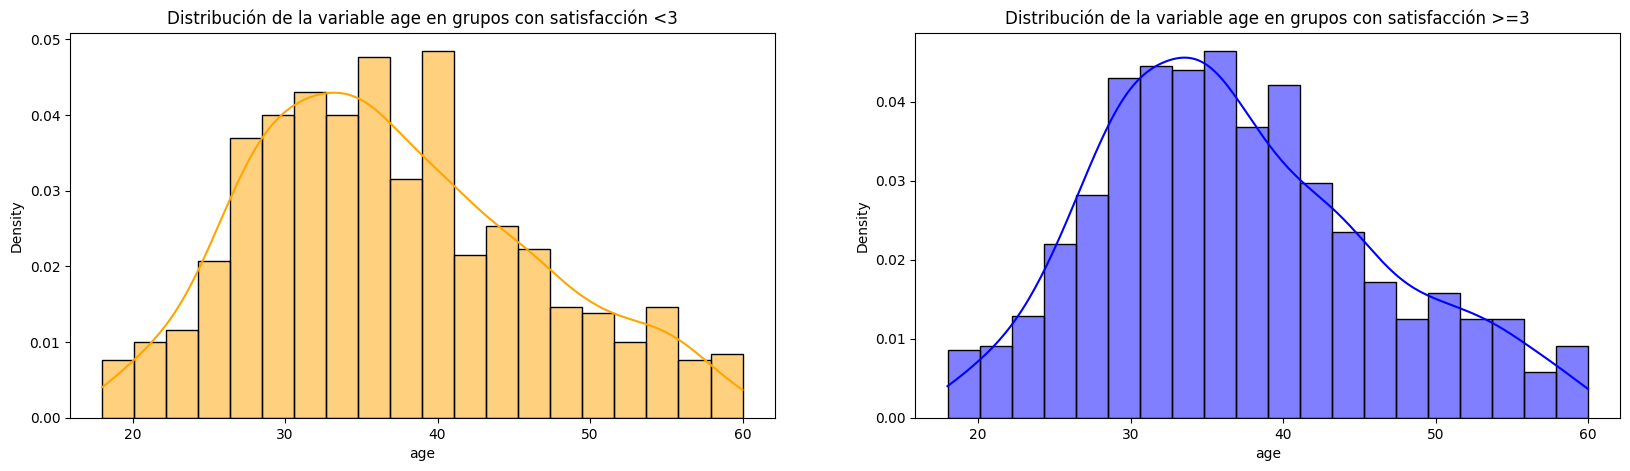

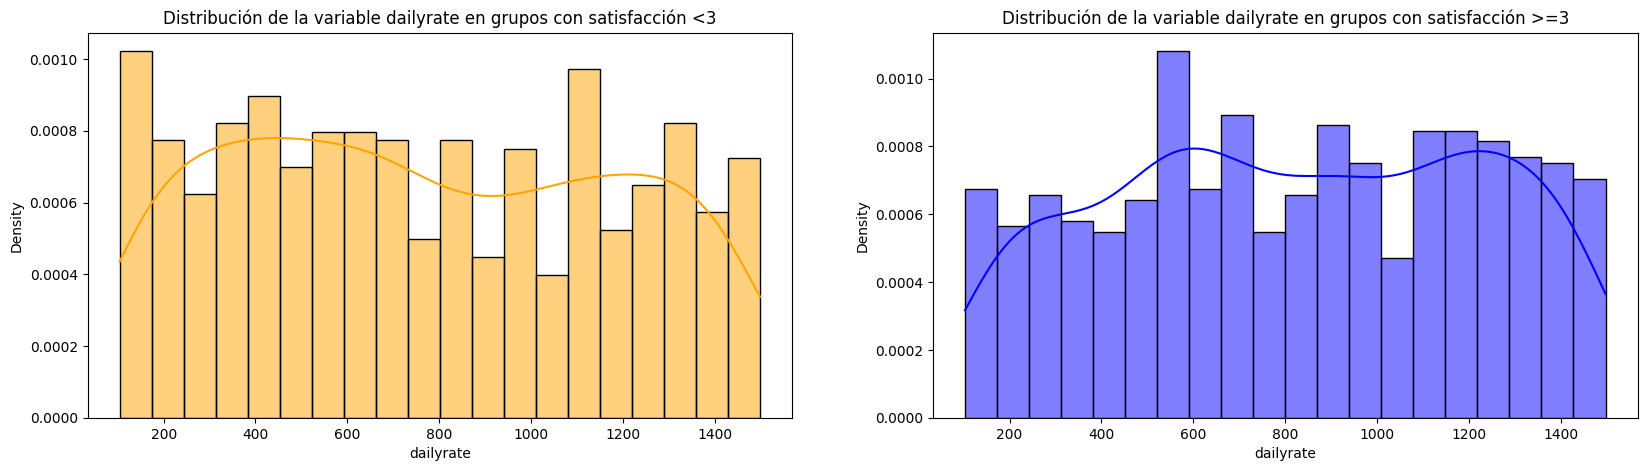

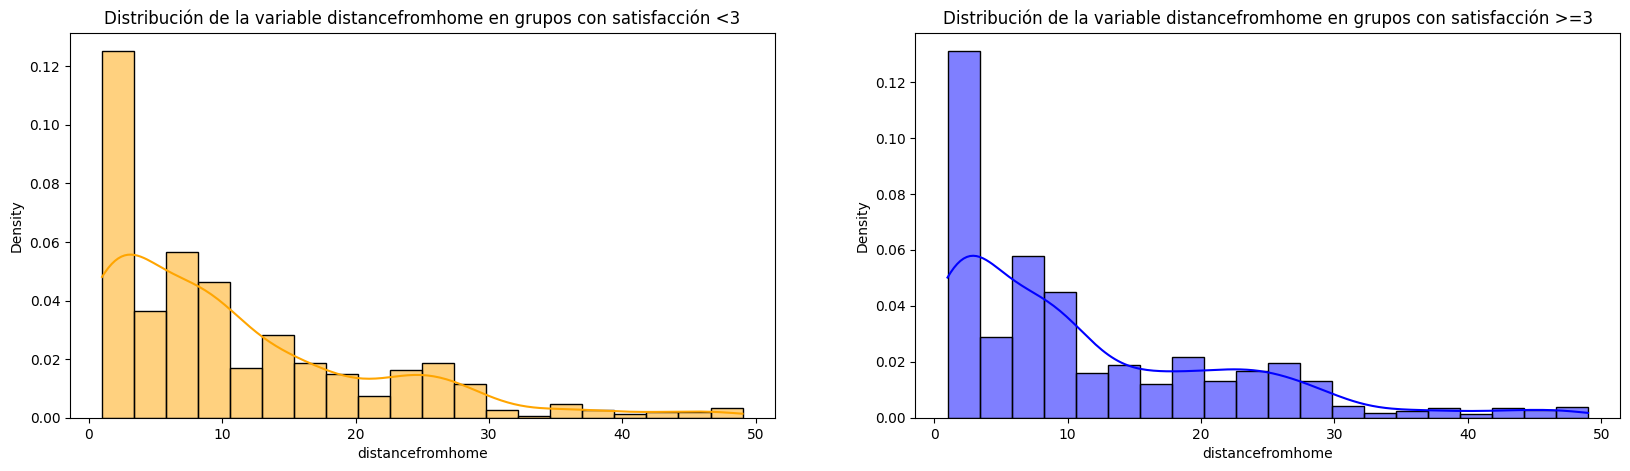

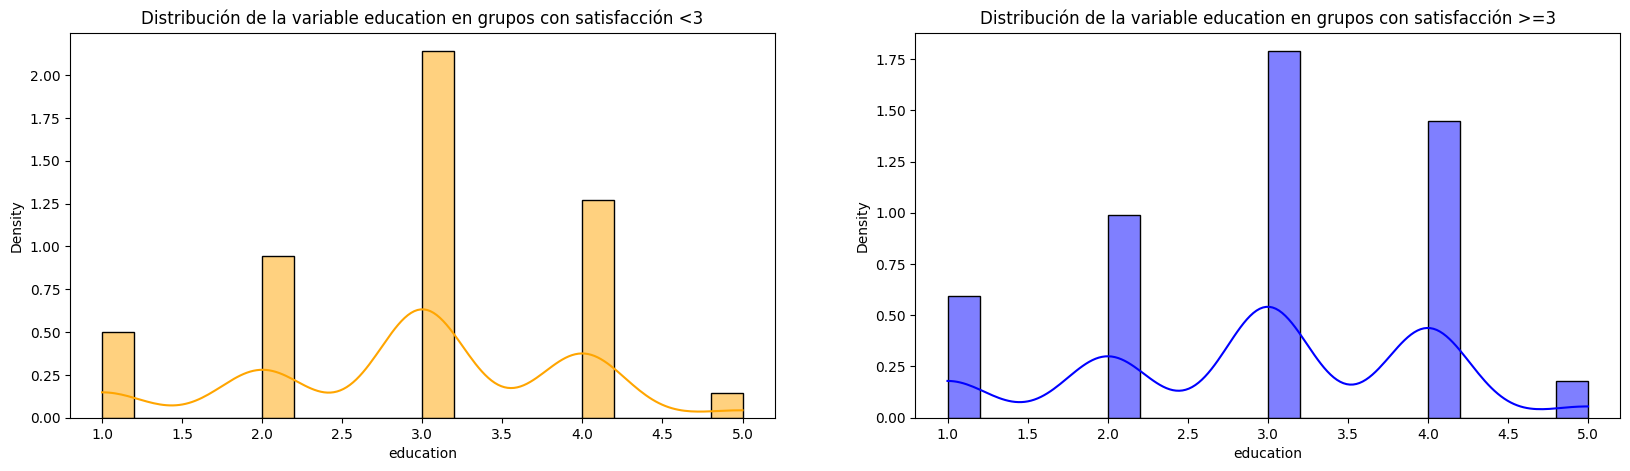

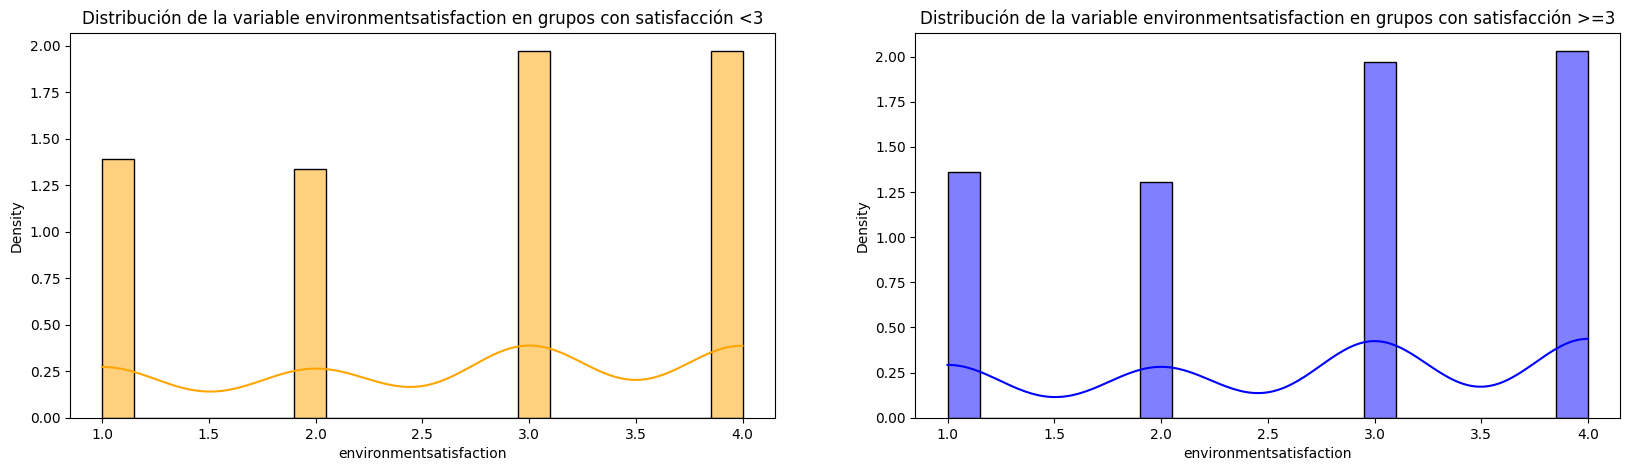

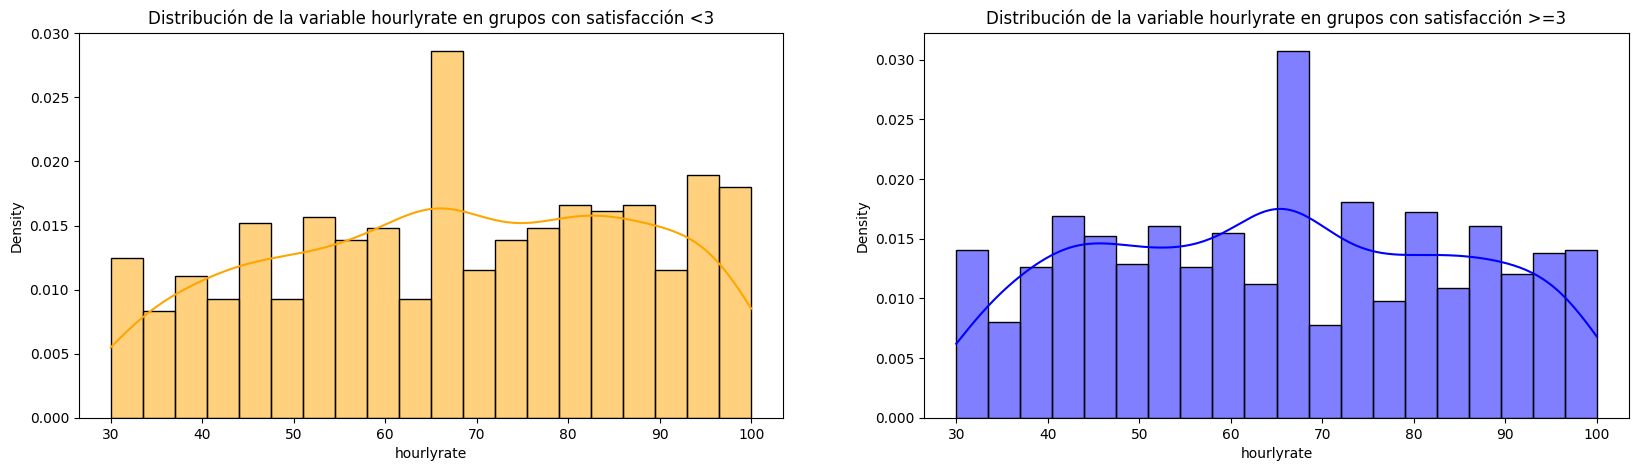

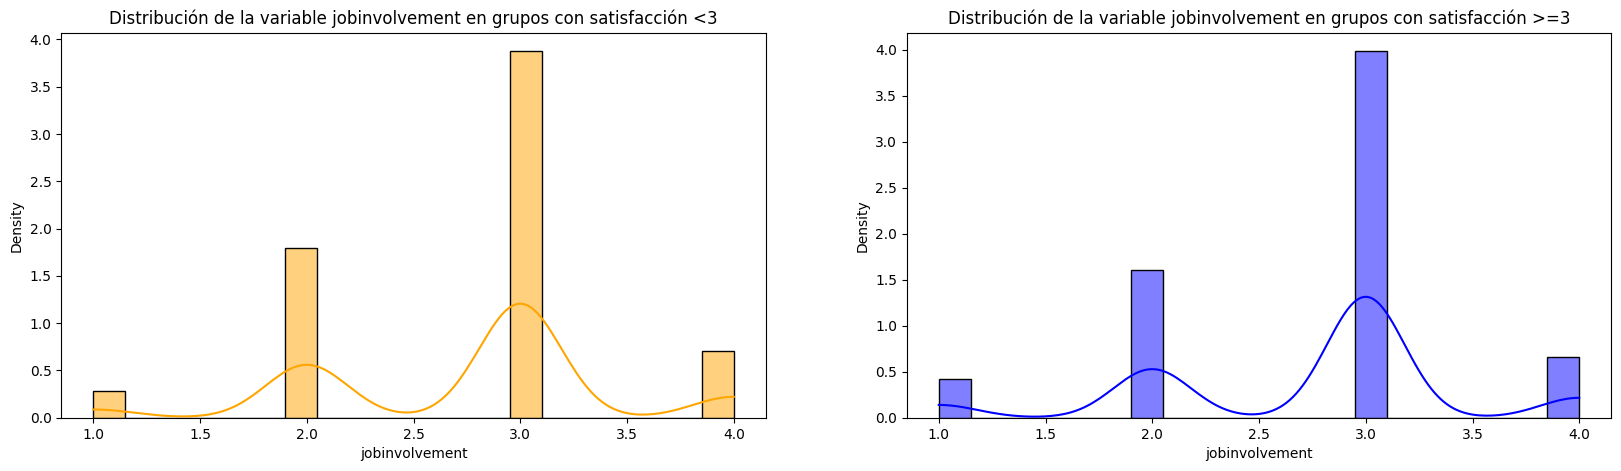

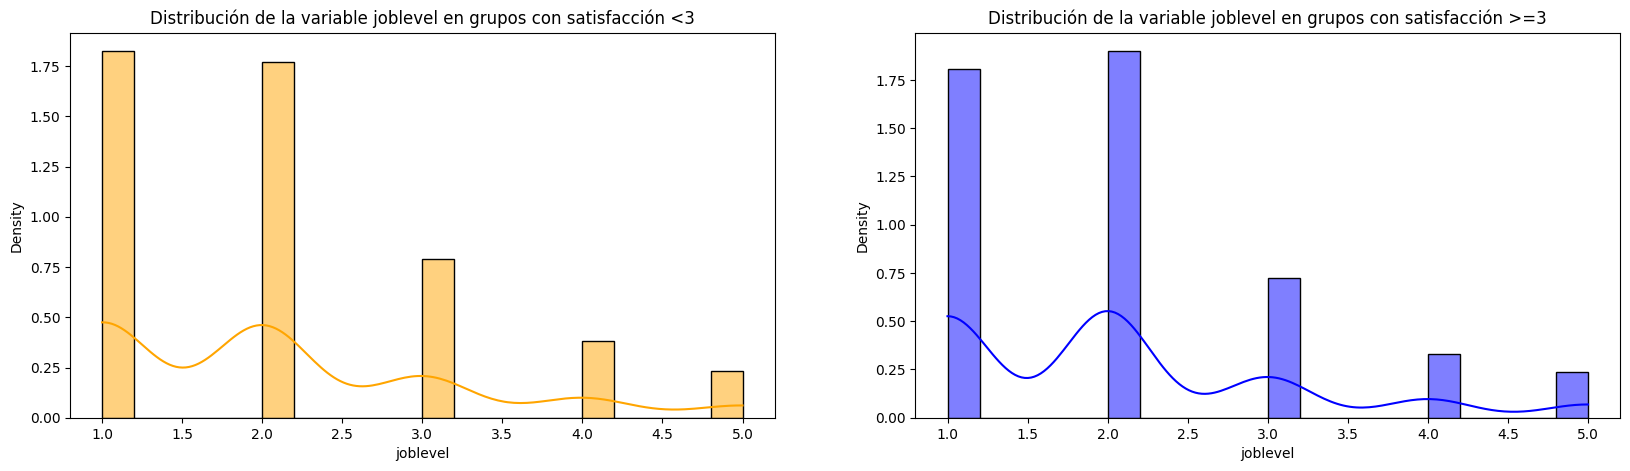

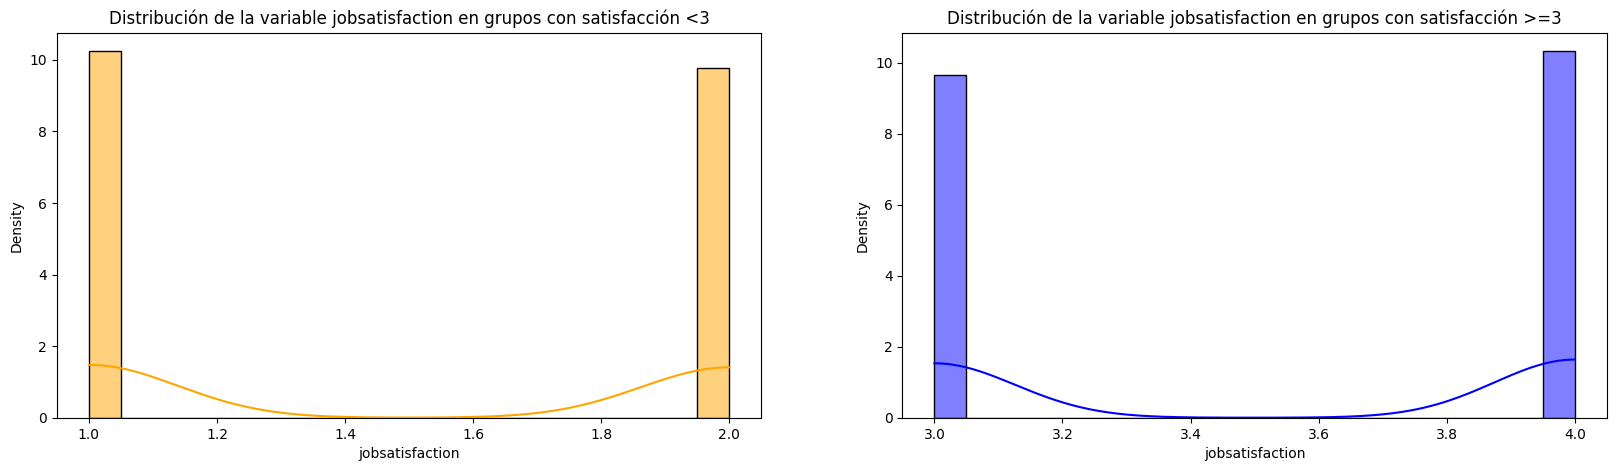

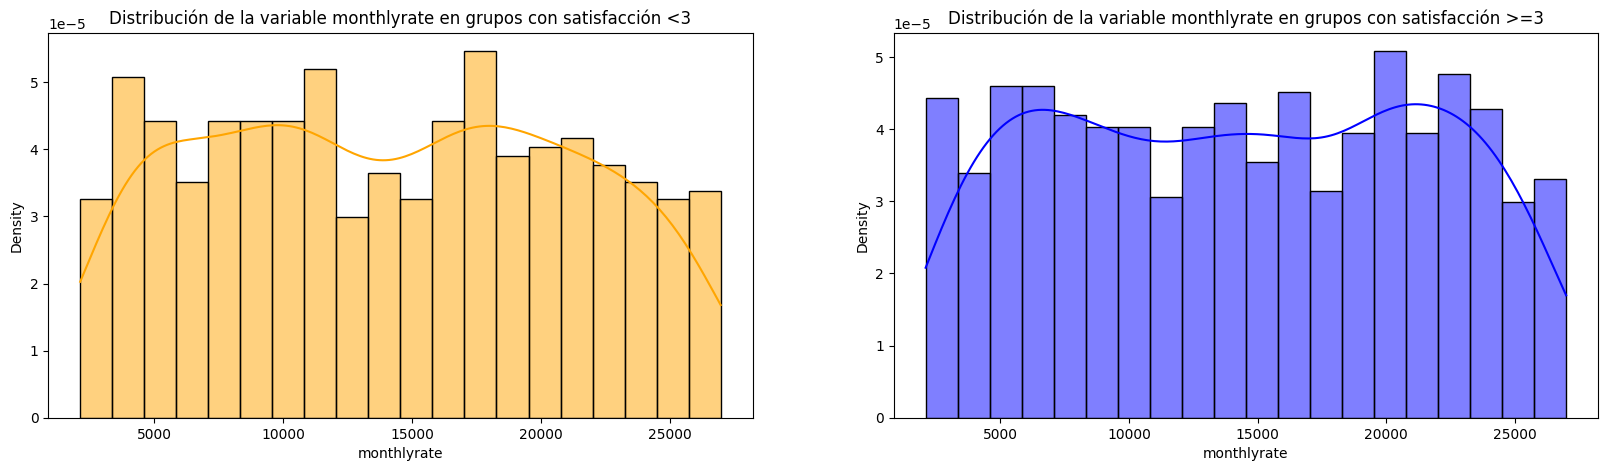

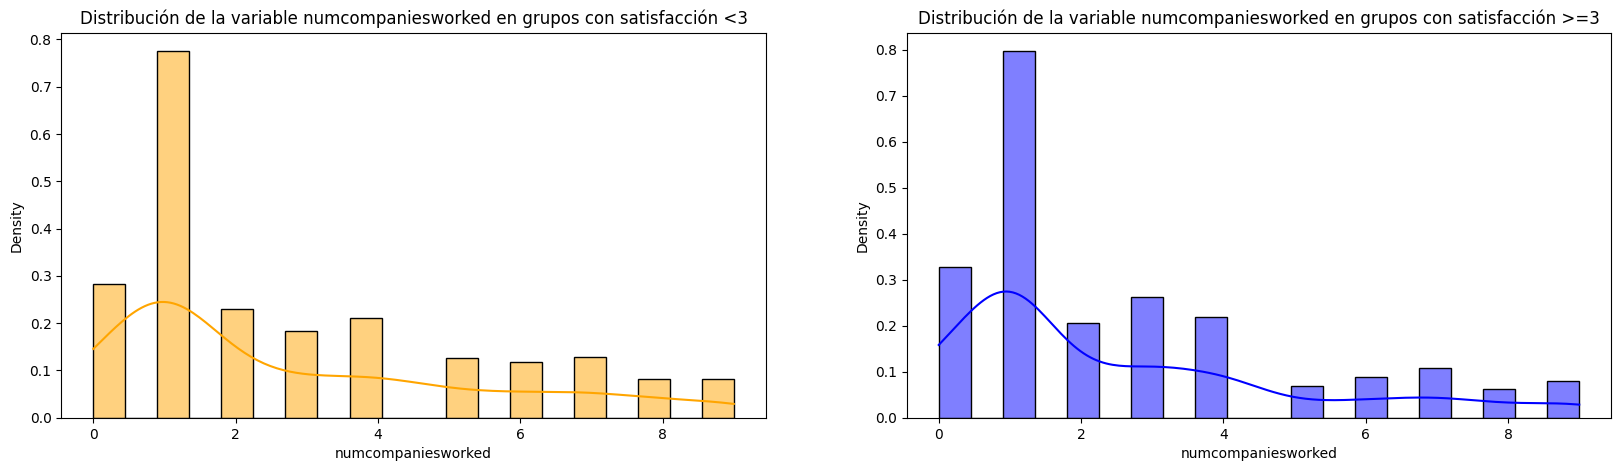

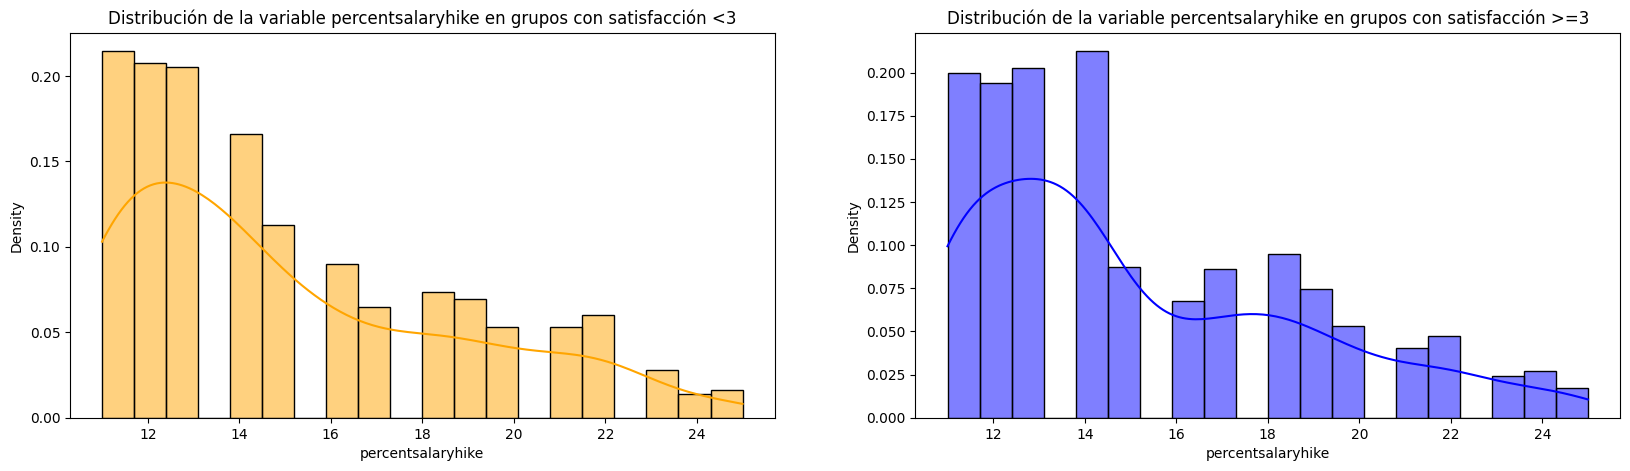

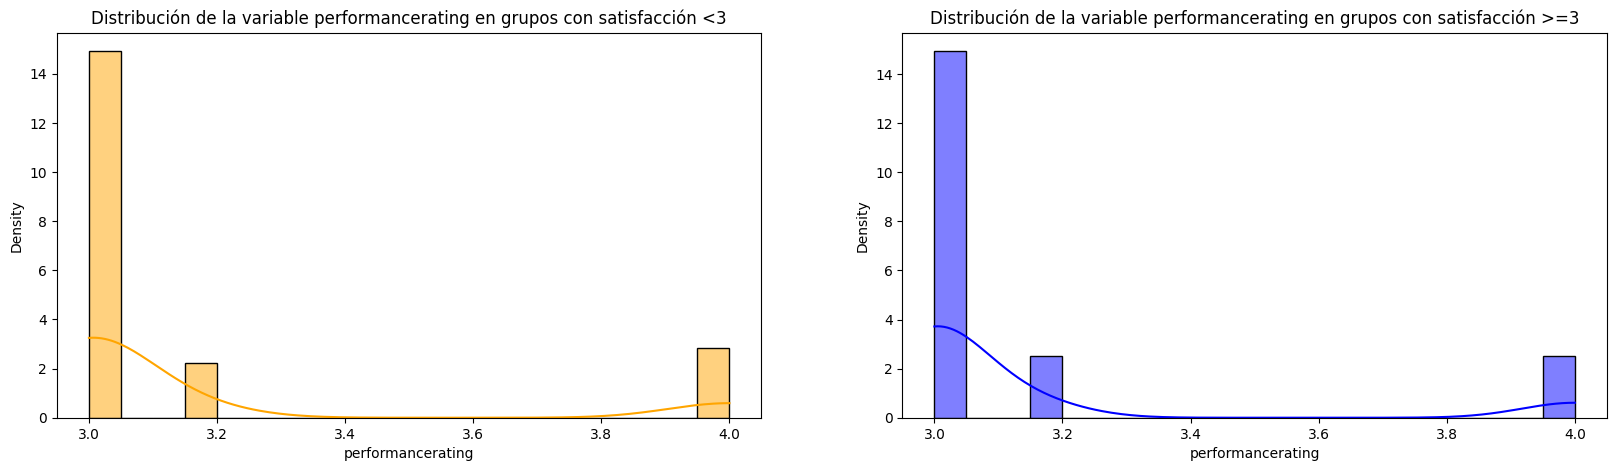

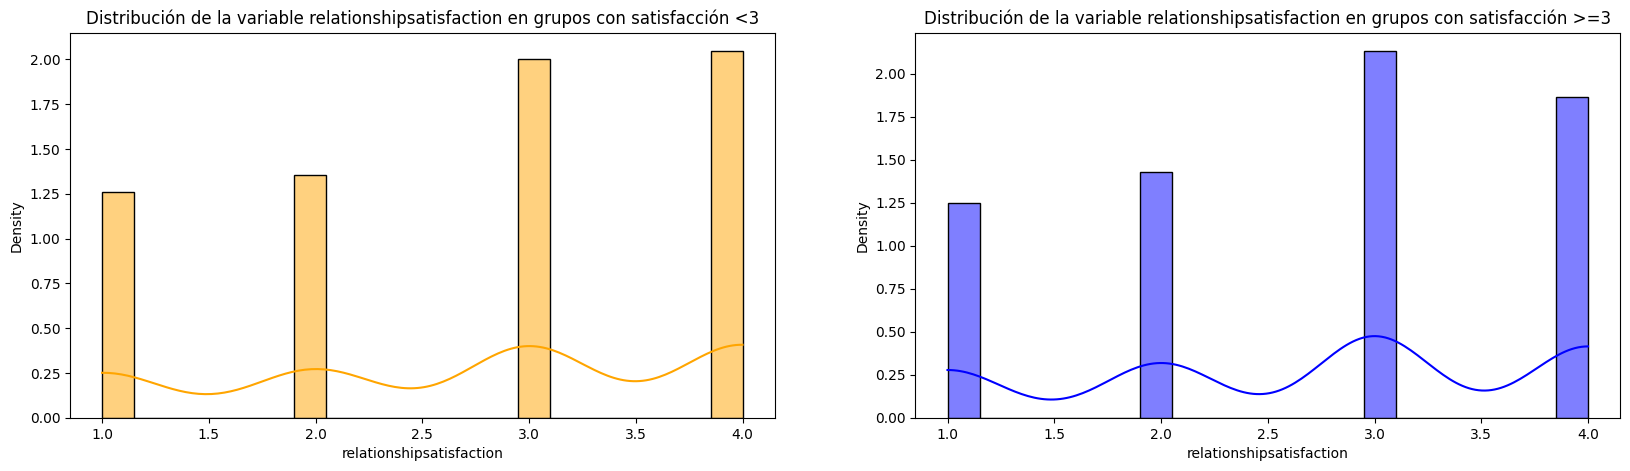

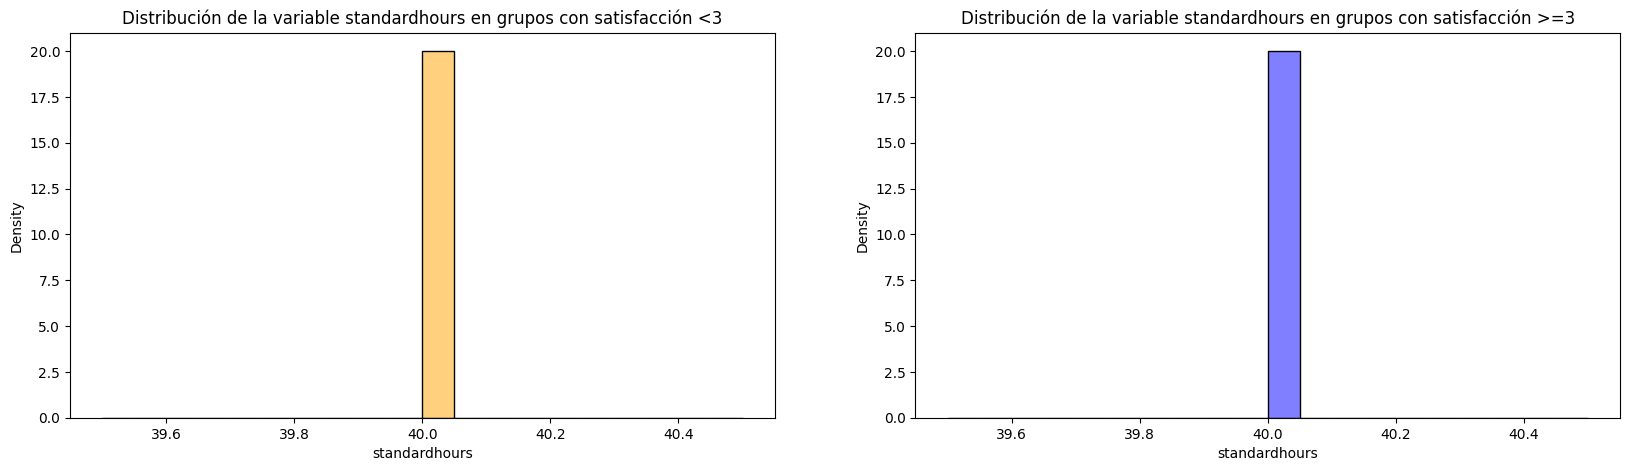

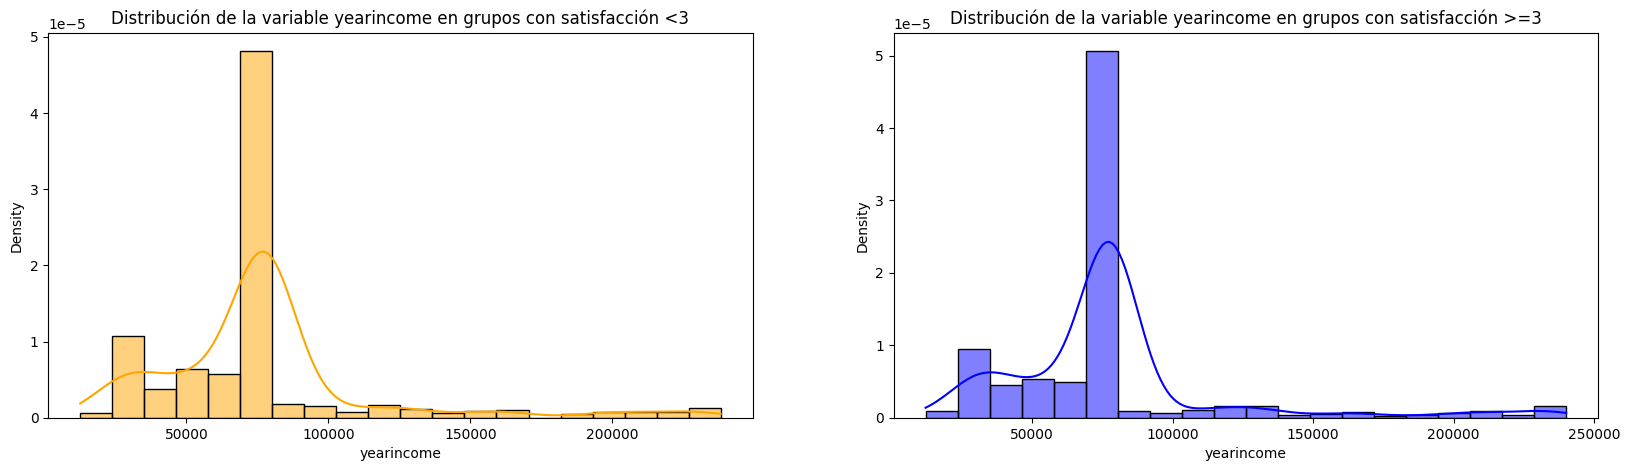

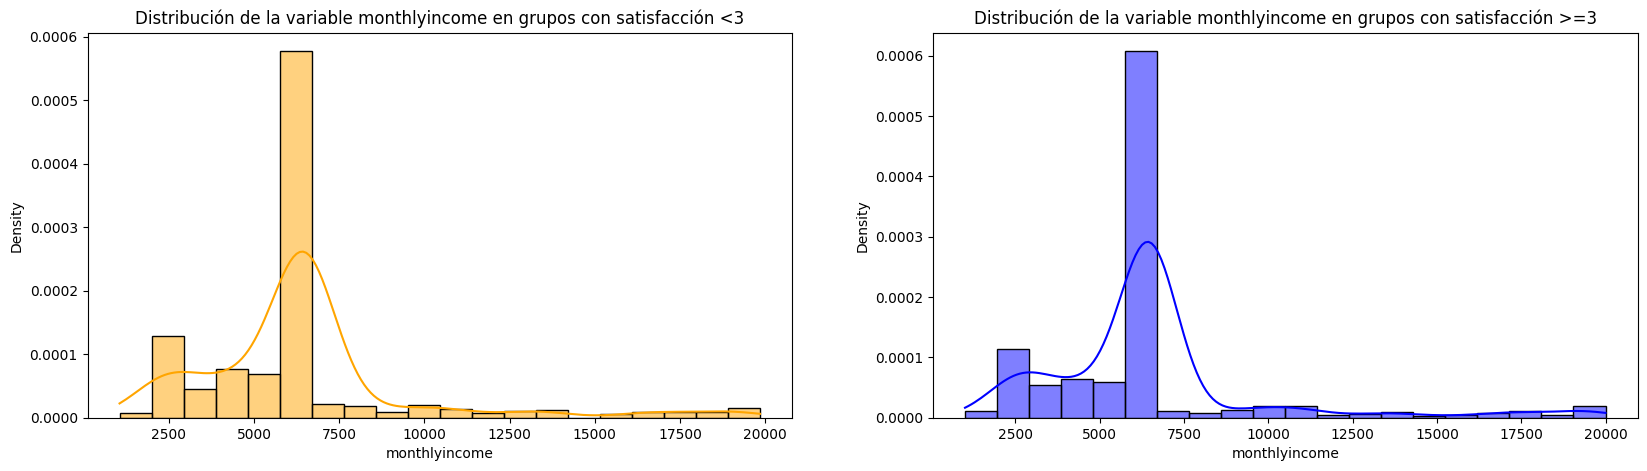

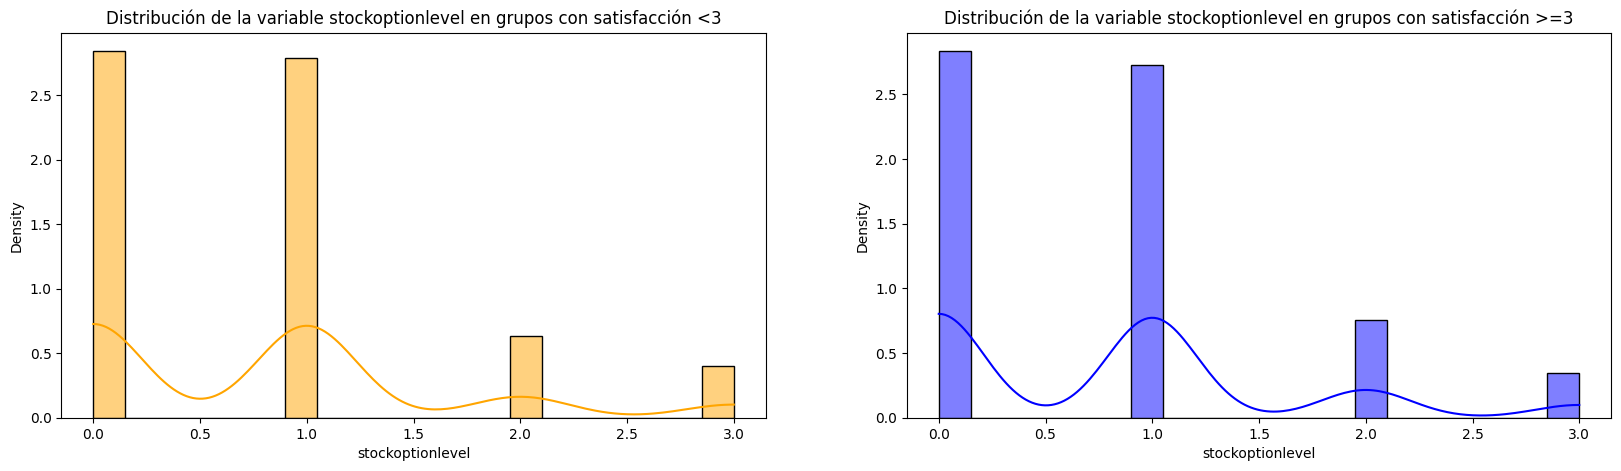

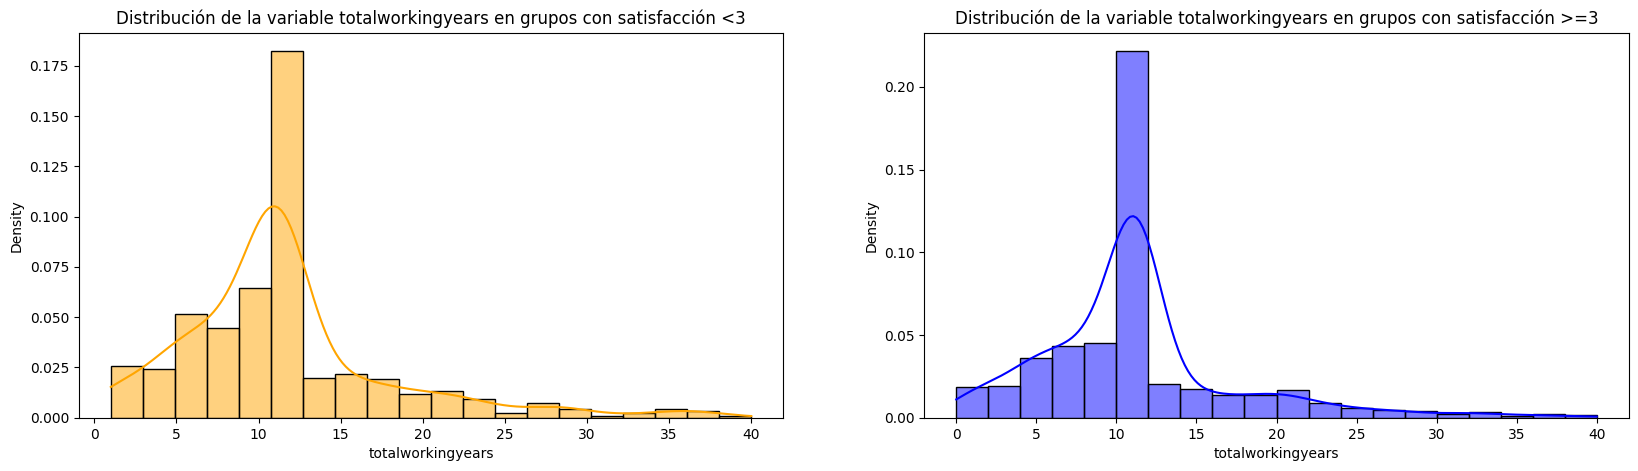

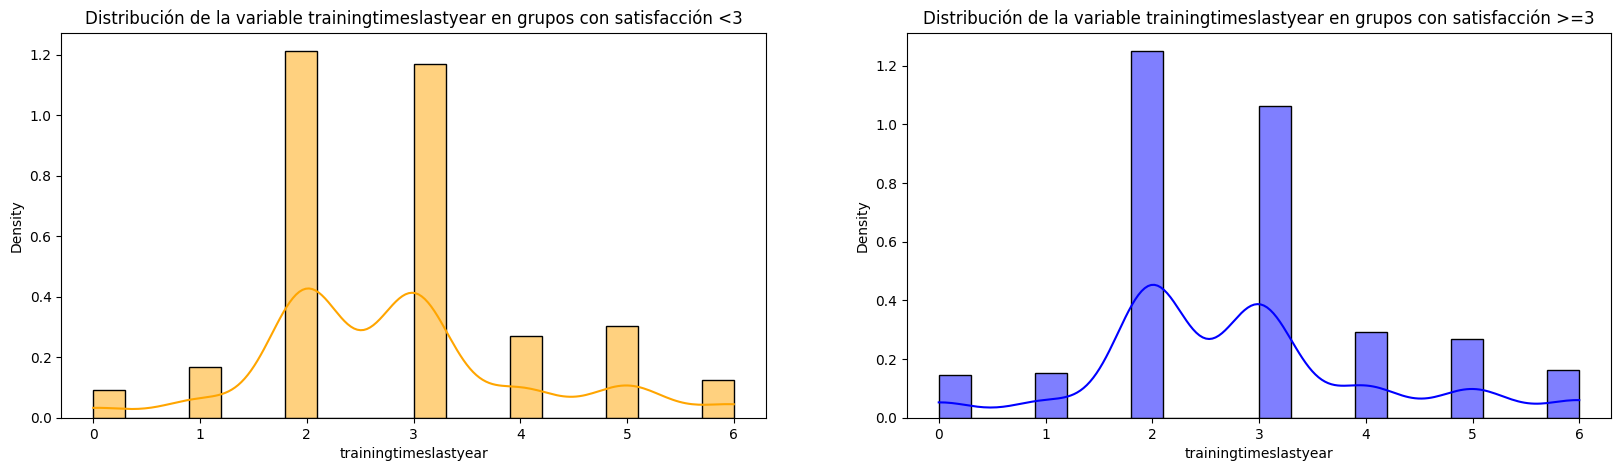

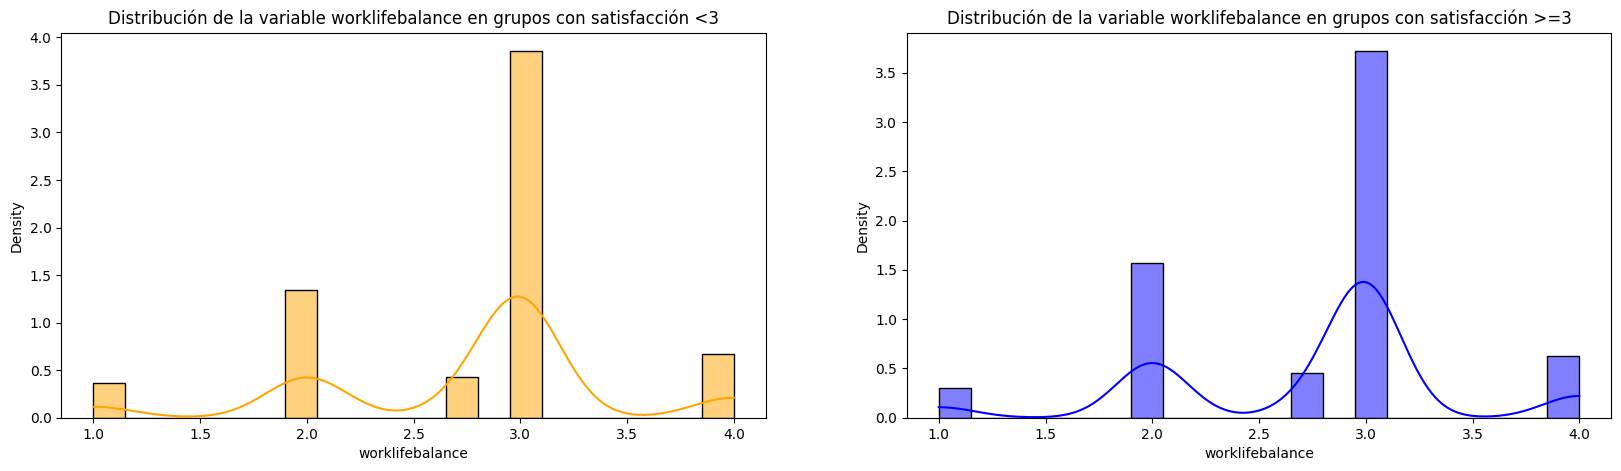

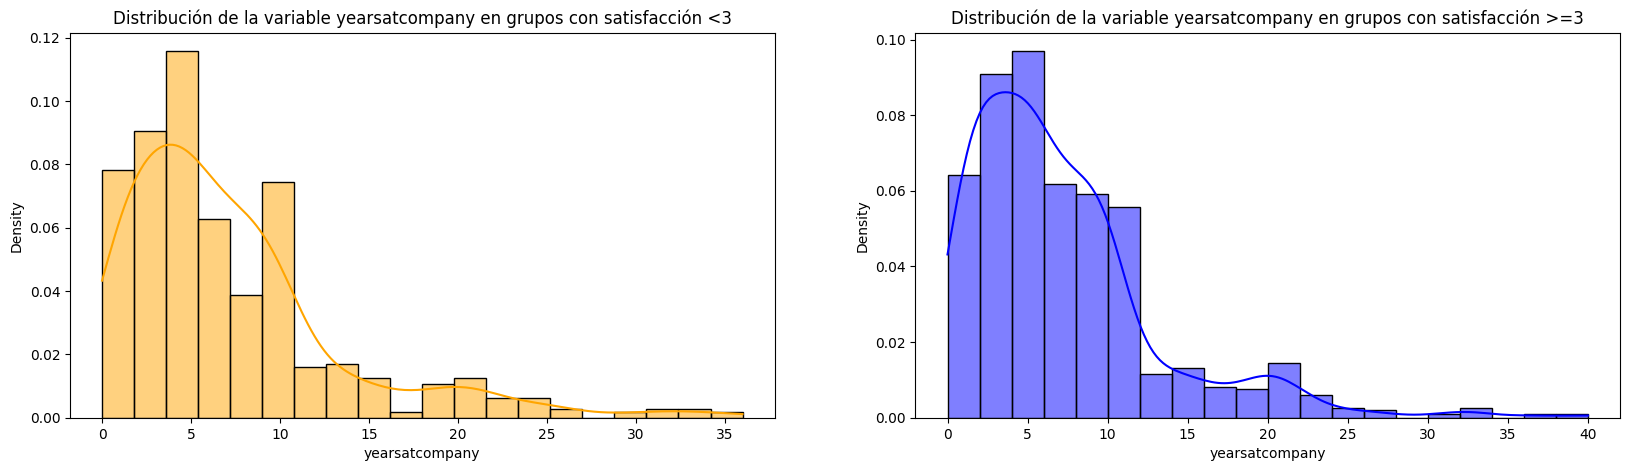

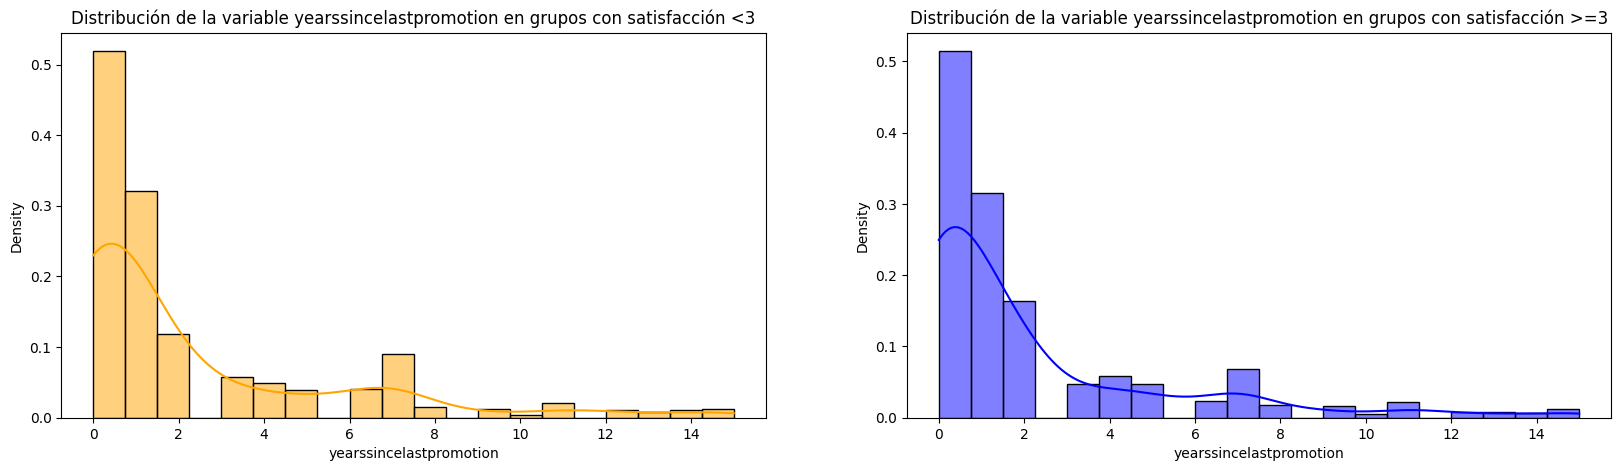

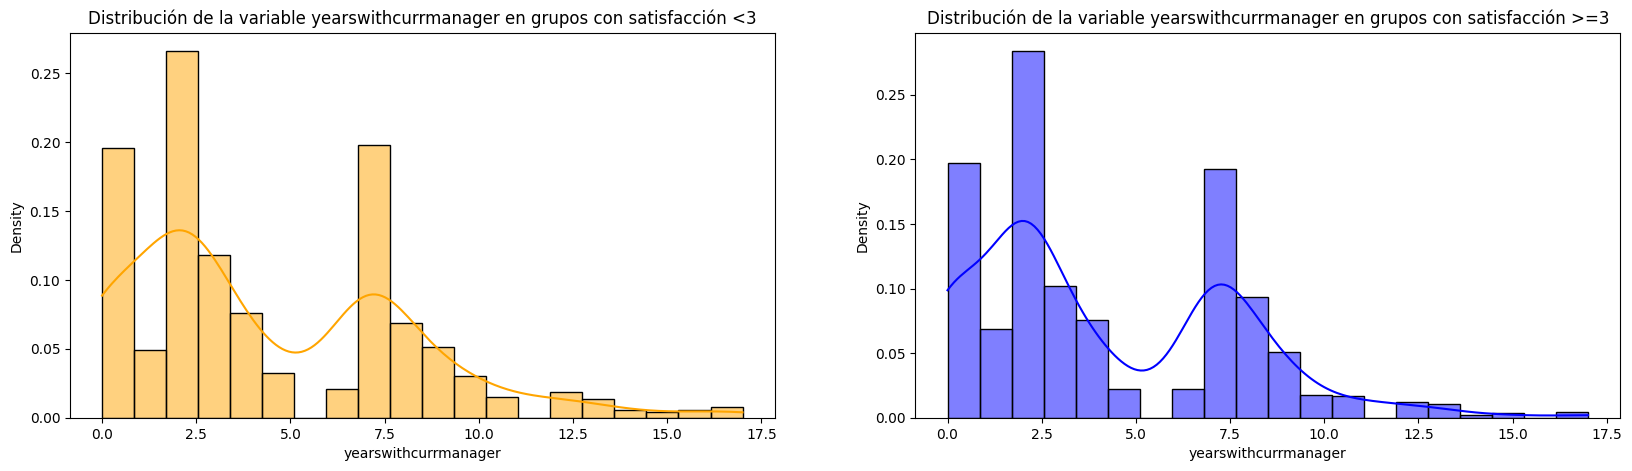

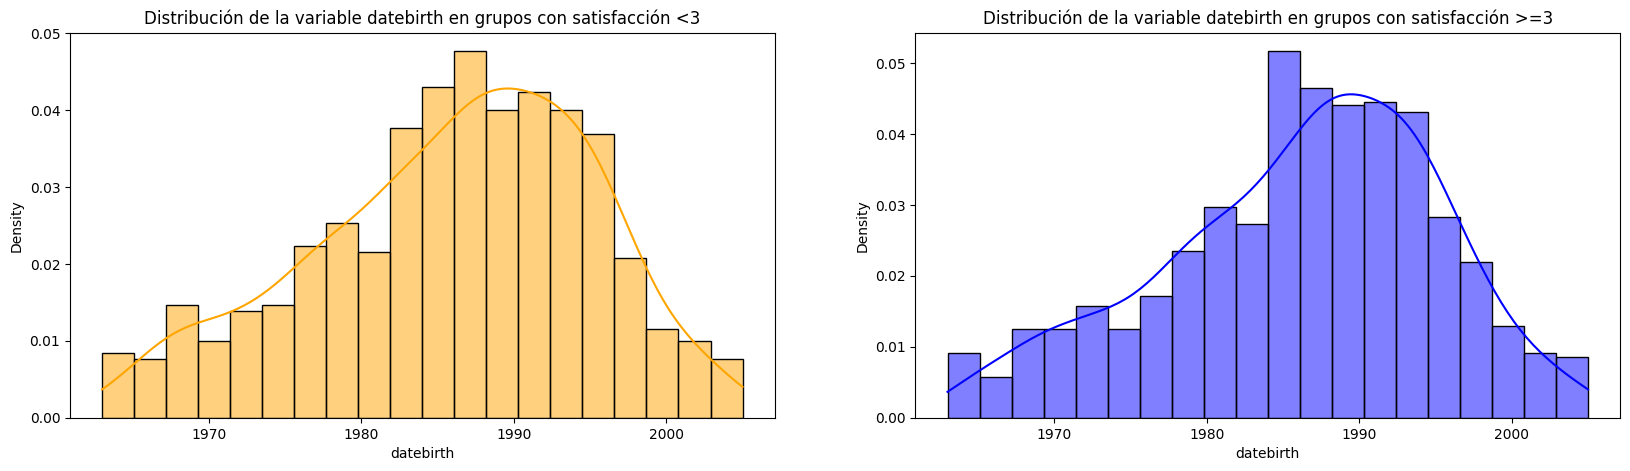

In [34]:
for col in columnas_numericas:
    comparar_variables_numericas(df_menor3, df_mayor3, col)

In [63]:
def comparar_variables_numericas_f (df_izquierda, df_derecha, variable):

    # Recibe dos dataframes y una variable. La función grafica la variable entre los dos grupos analizando.
    # Mostramos la densidad en lugar de la frecuencia para que el tamaño distinto de las diferentes muestras no lleve a equívoco 

    # Ordenamos los dataframes 
    df_i = df_izquierda.sort_values(by = variable, ascending = False)
    df_d = df_derecha.sort_values(by = variable, ascending = False)

    # Crear la figura y el eje 
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5)) 

    sns.histplot(x = variable, 
            data = df_i, 
            color = "red", 
            kde = True, 
            bins = 20,
            ax = axes[0]);
    
    sns.histplot(x = variable, 
            data = df_d, 
            color = "green", 
            kde = True, 
            bins = 20,
            ax = axes[1])

    # Añadimos título 
    axes[0].set_title(f"Distribución de la variable {variable} en grupos con satisfacción <3")
    axes[1].set_title(f"Distribución de la variable {variable} en grupos con satisfacción >=3")

    # cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
    axes[0].set_xlabel(variable)

    # cambiamos el nombre de los ejes usando los métodos
    axes[1].set_xlabel(f"{variable}")
    ;


C:\Users\anabo\AppData\Local\Temp\ipykernel_11984\3819637809.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))


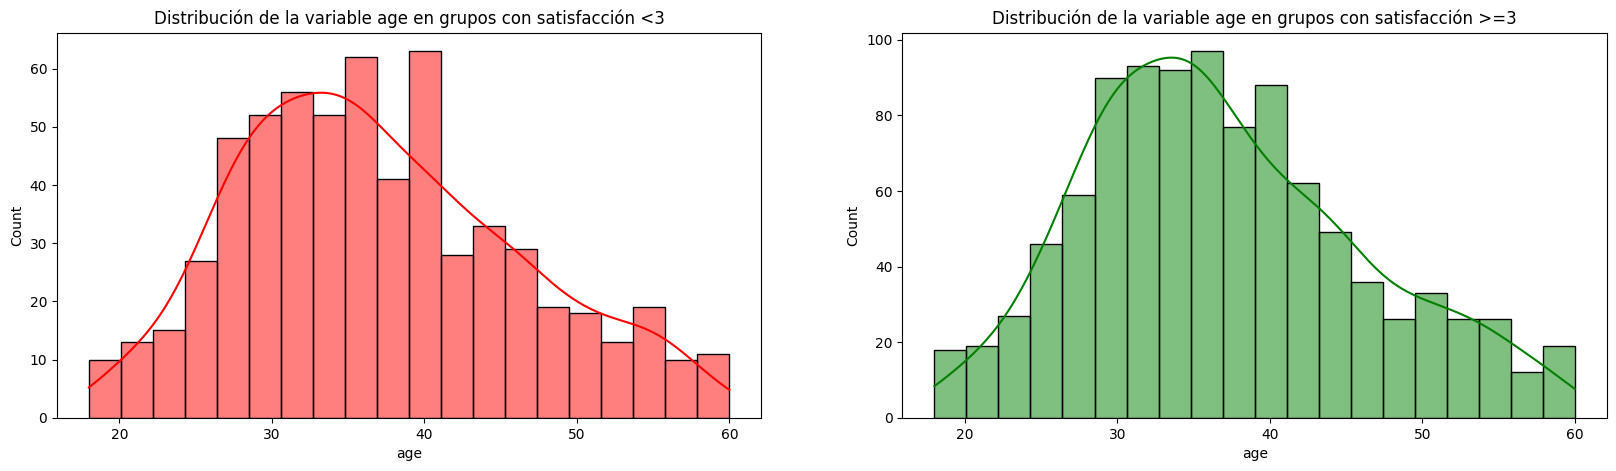

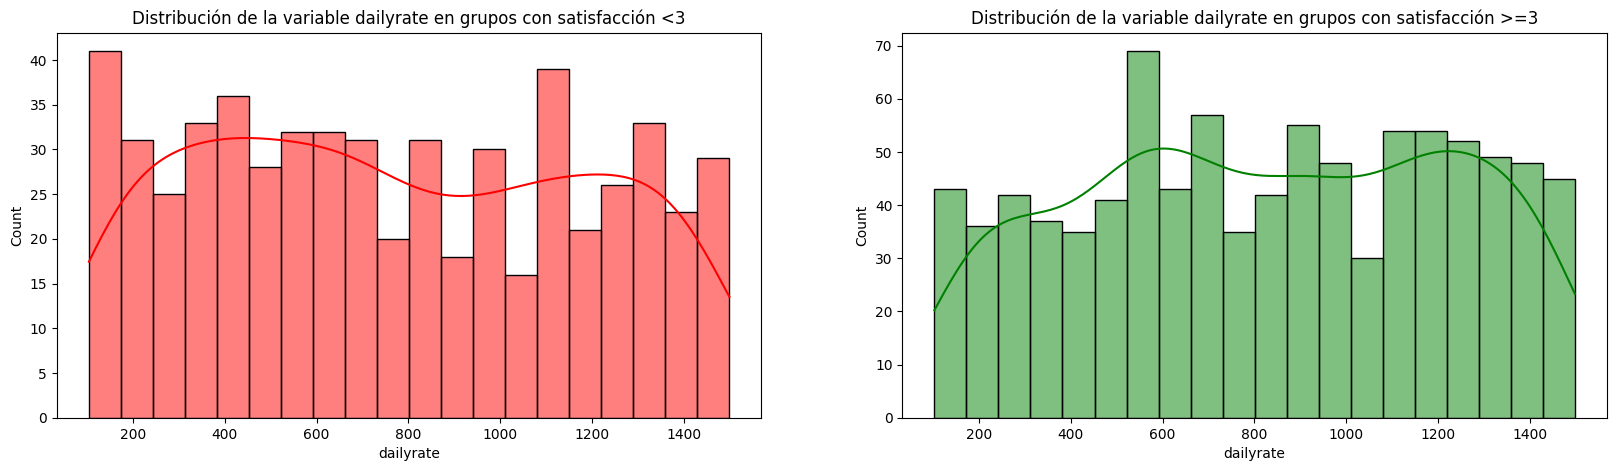

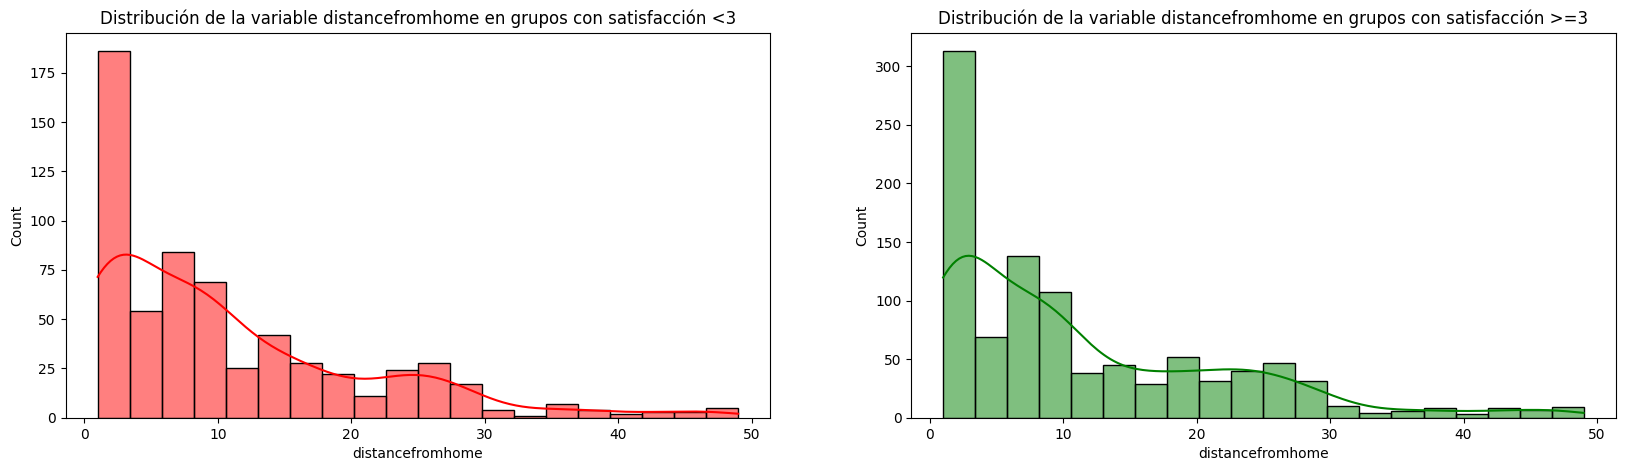

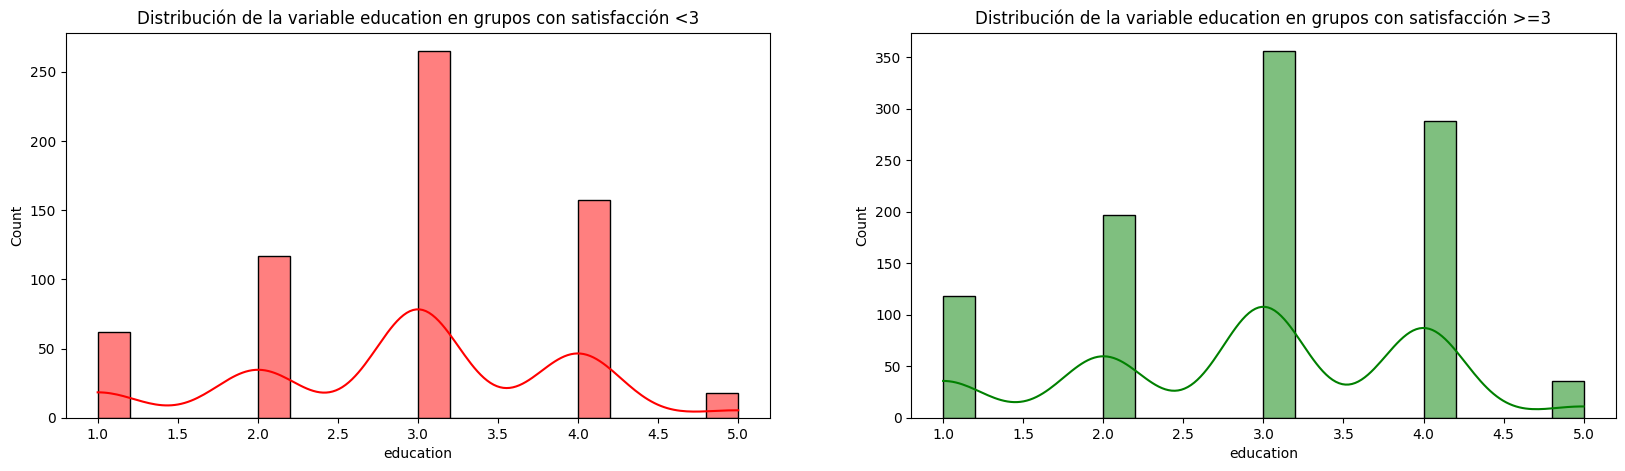

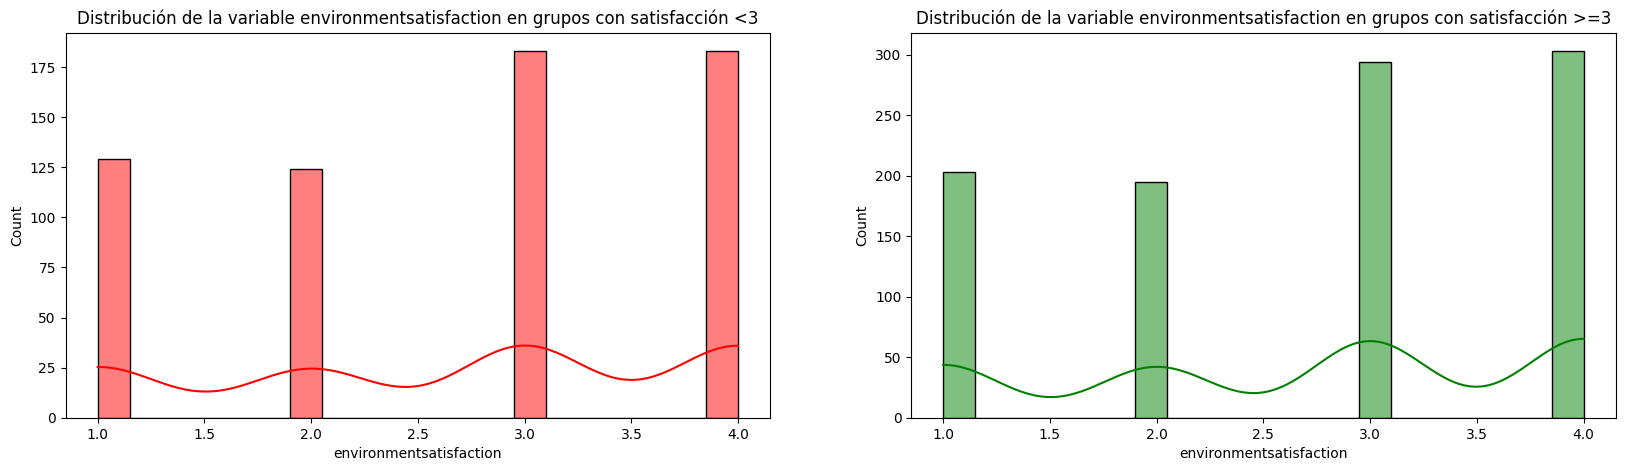

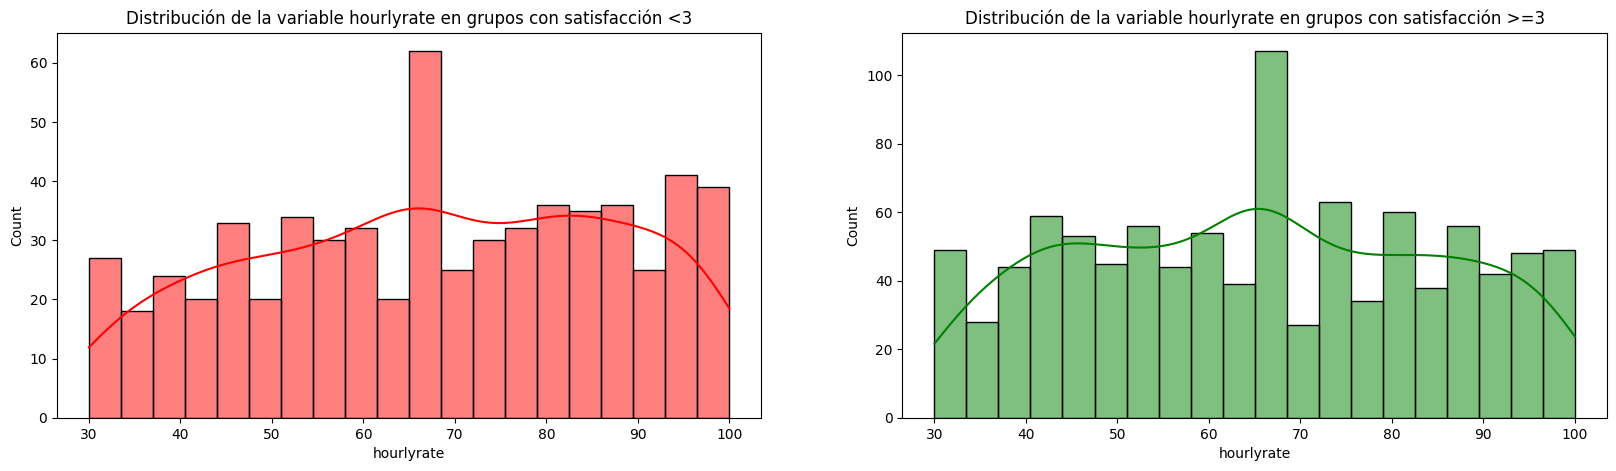

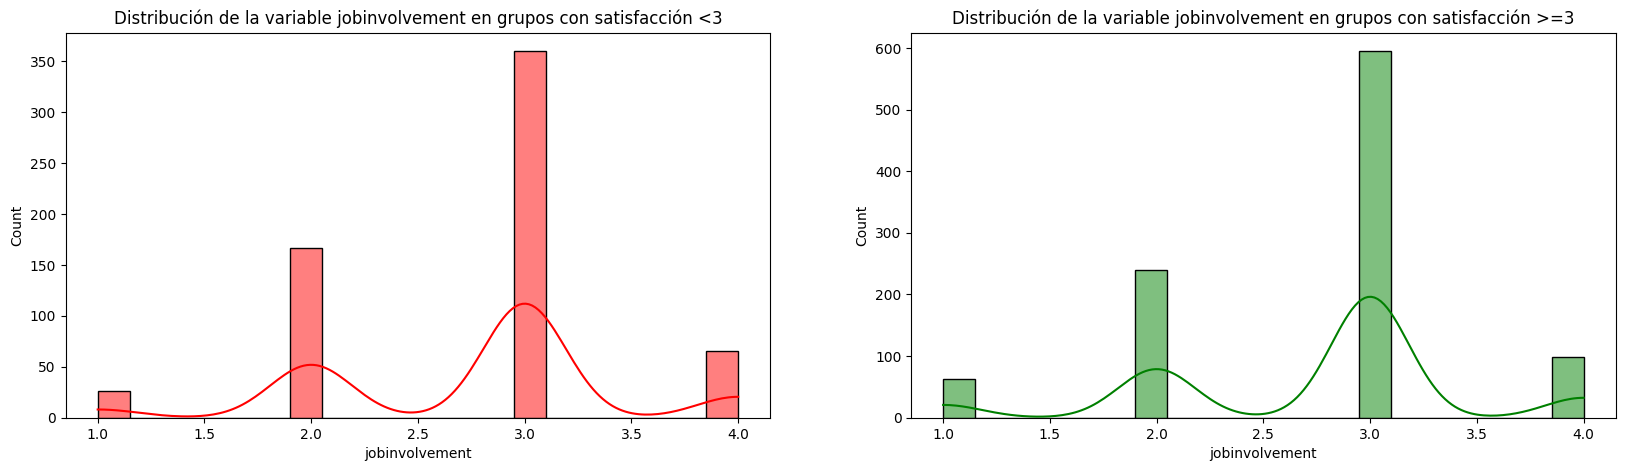

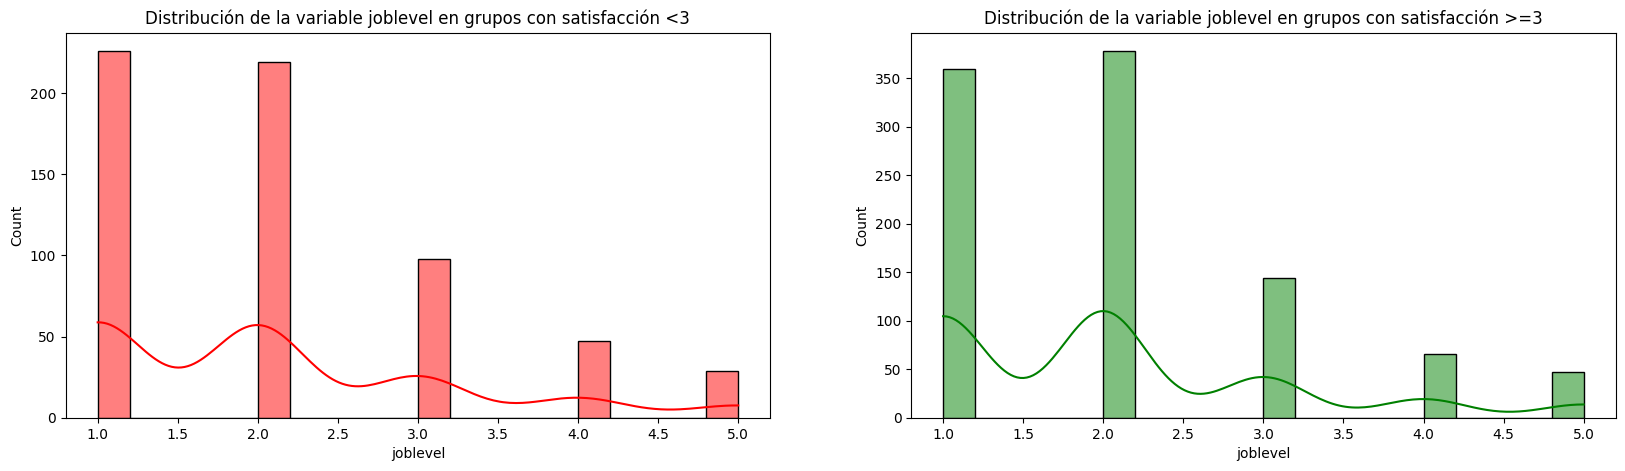

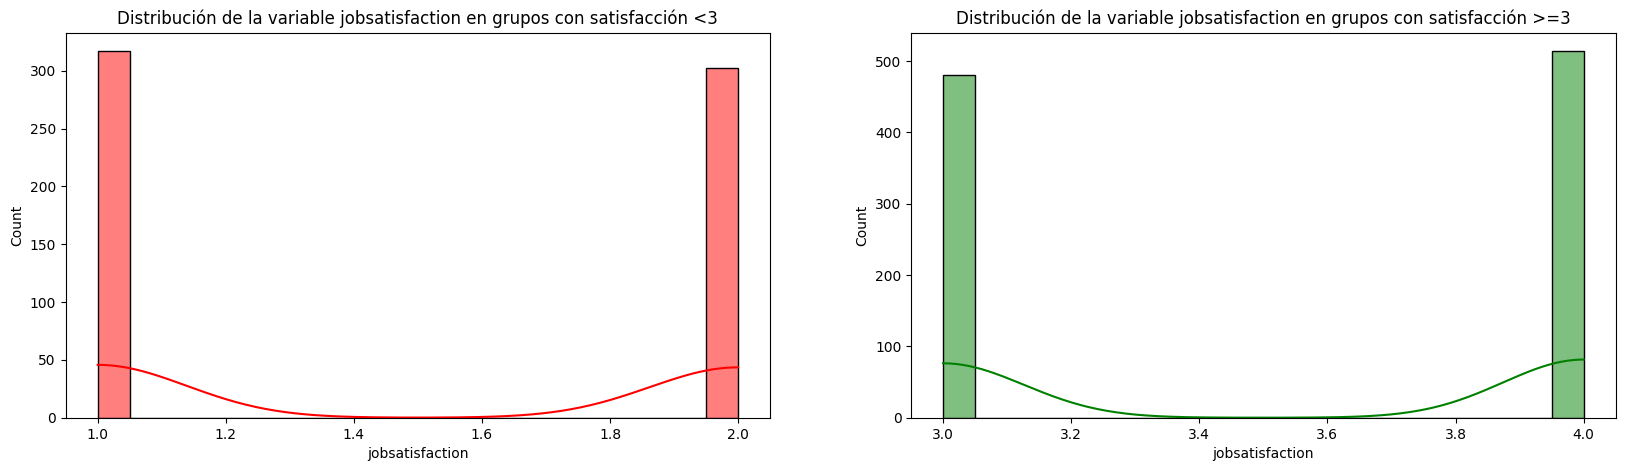

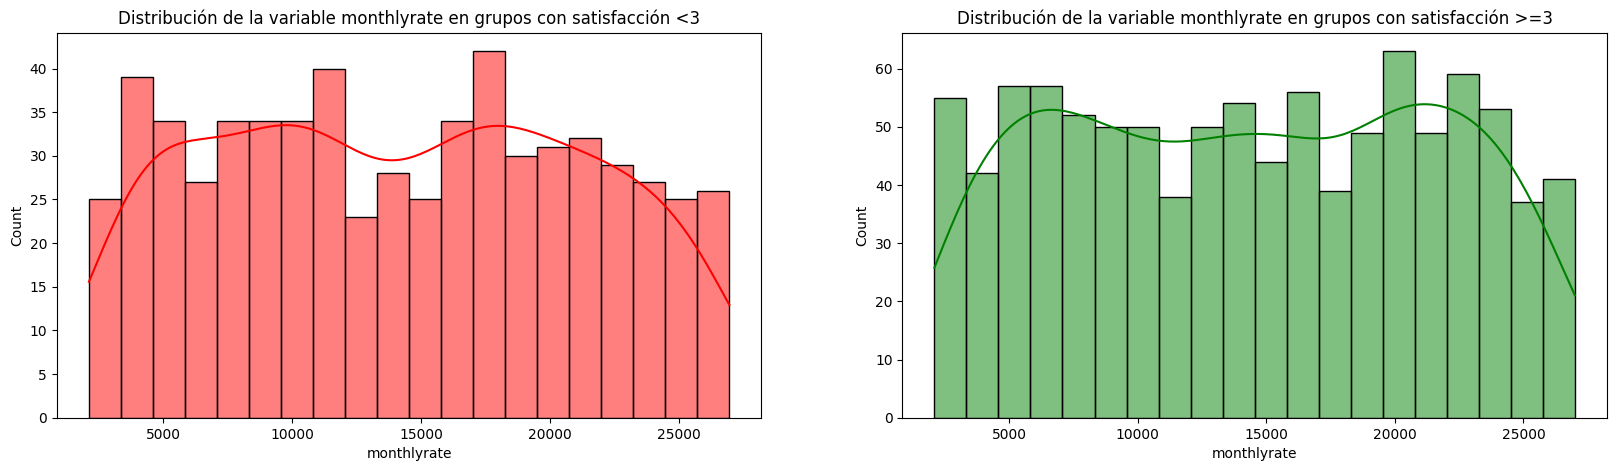

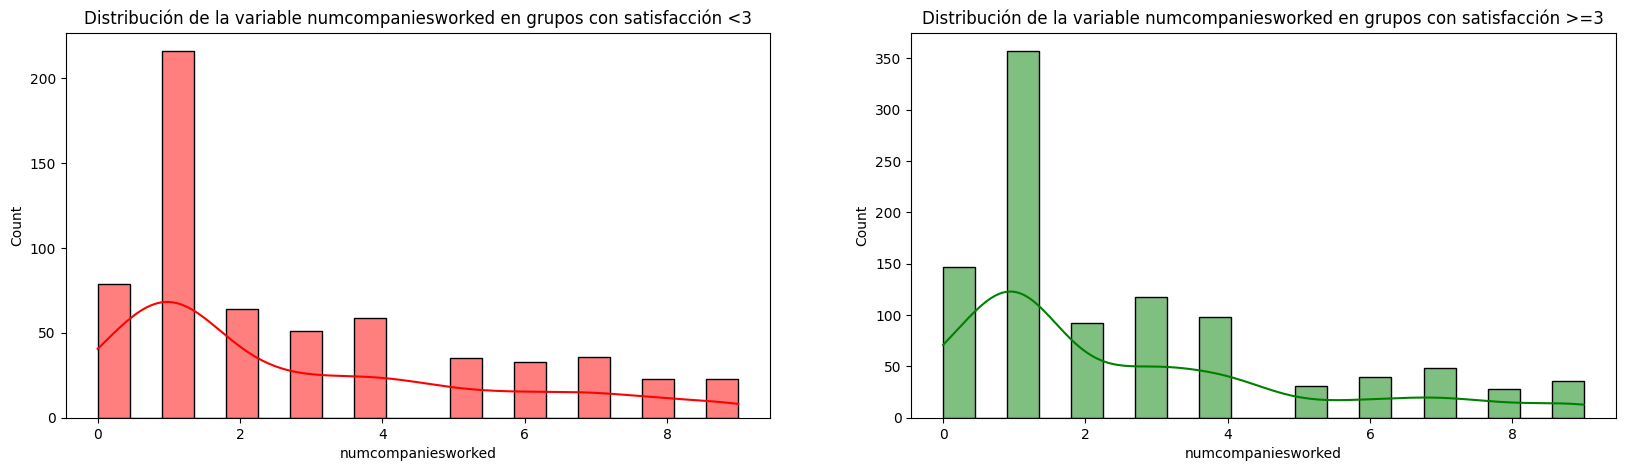

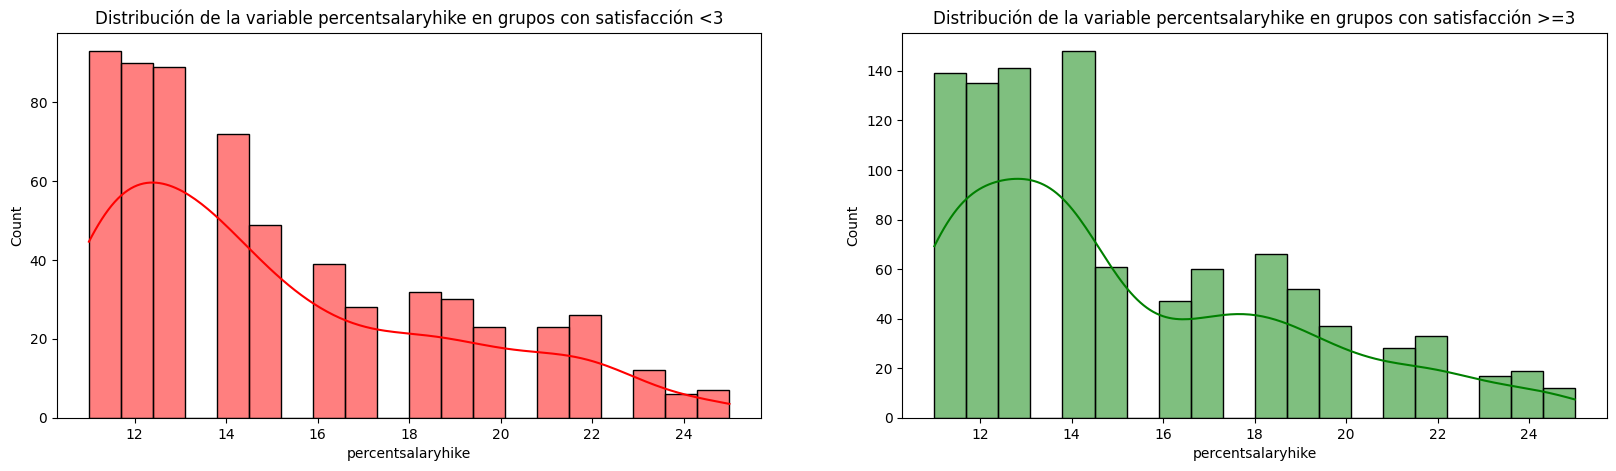

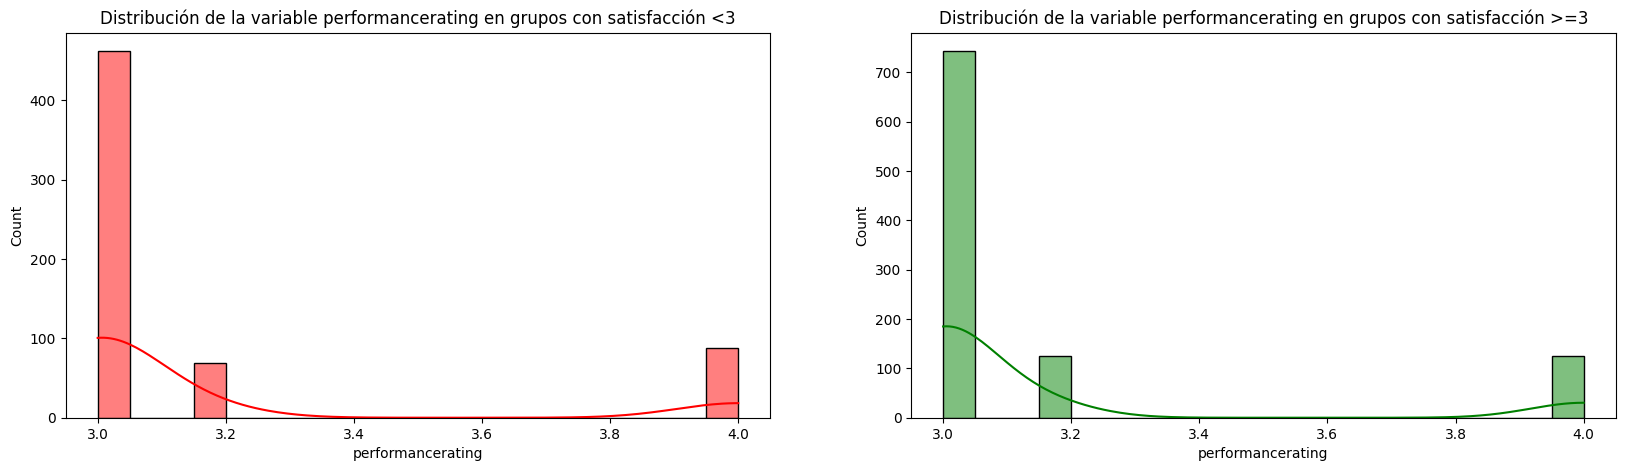

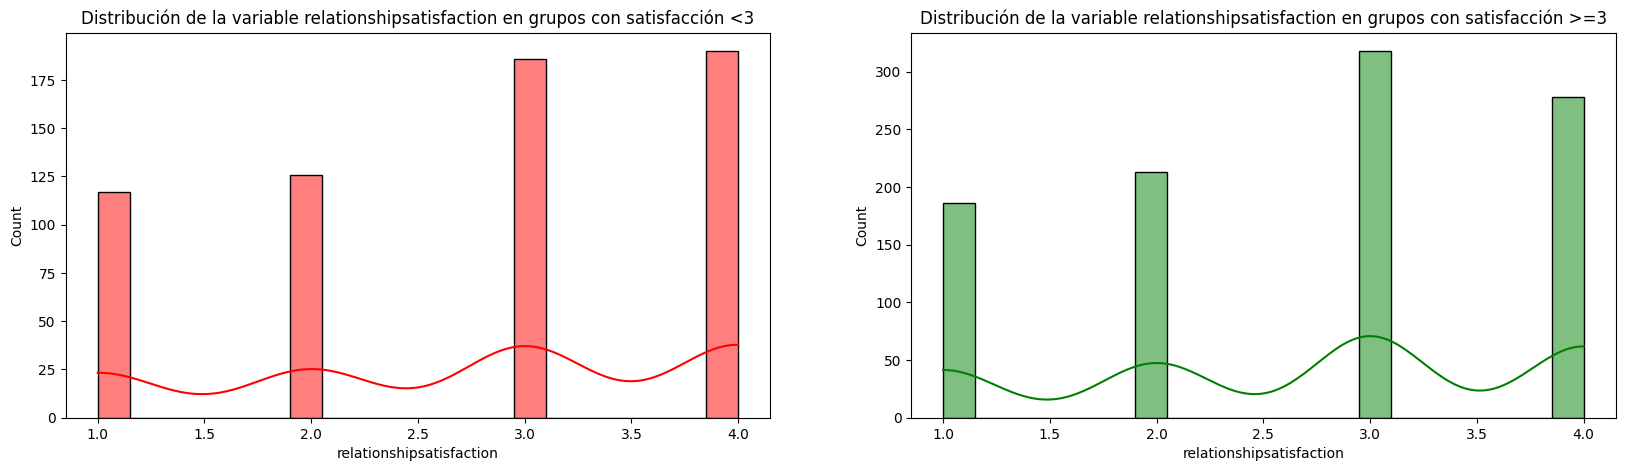

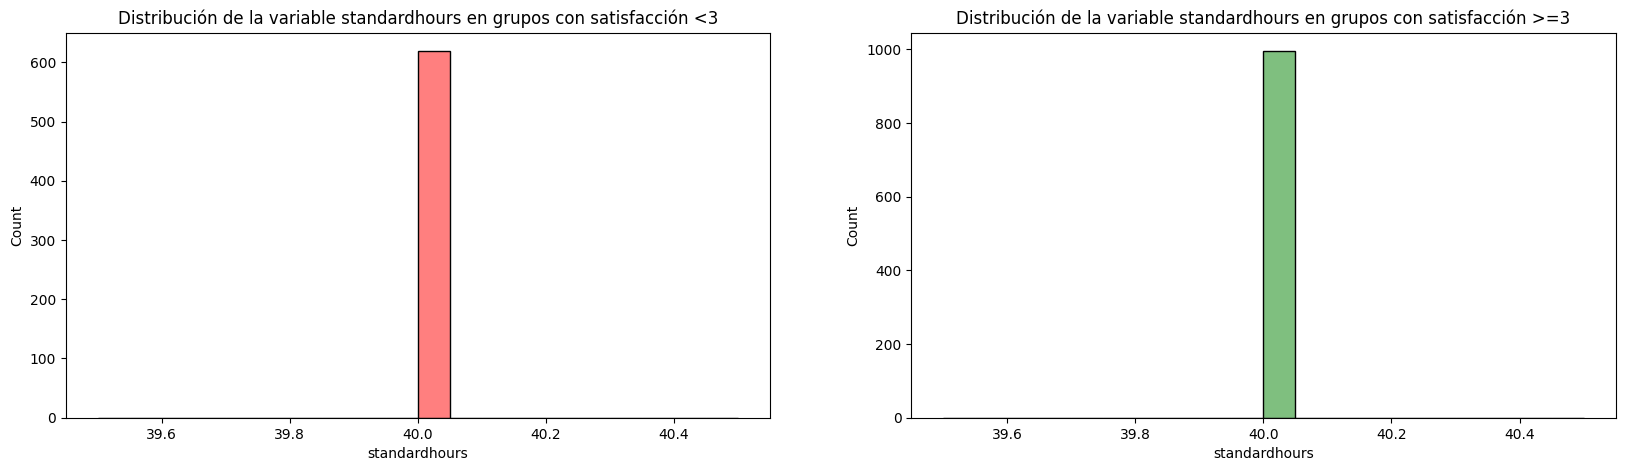

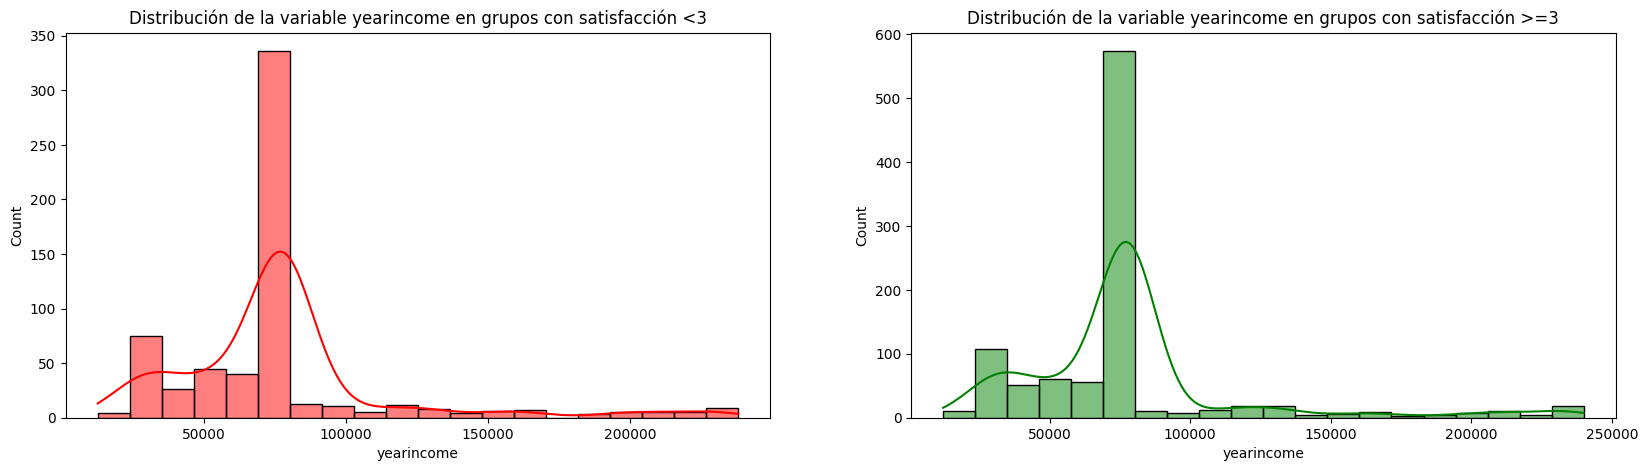

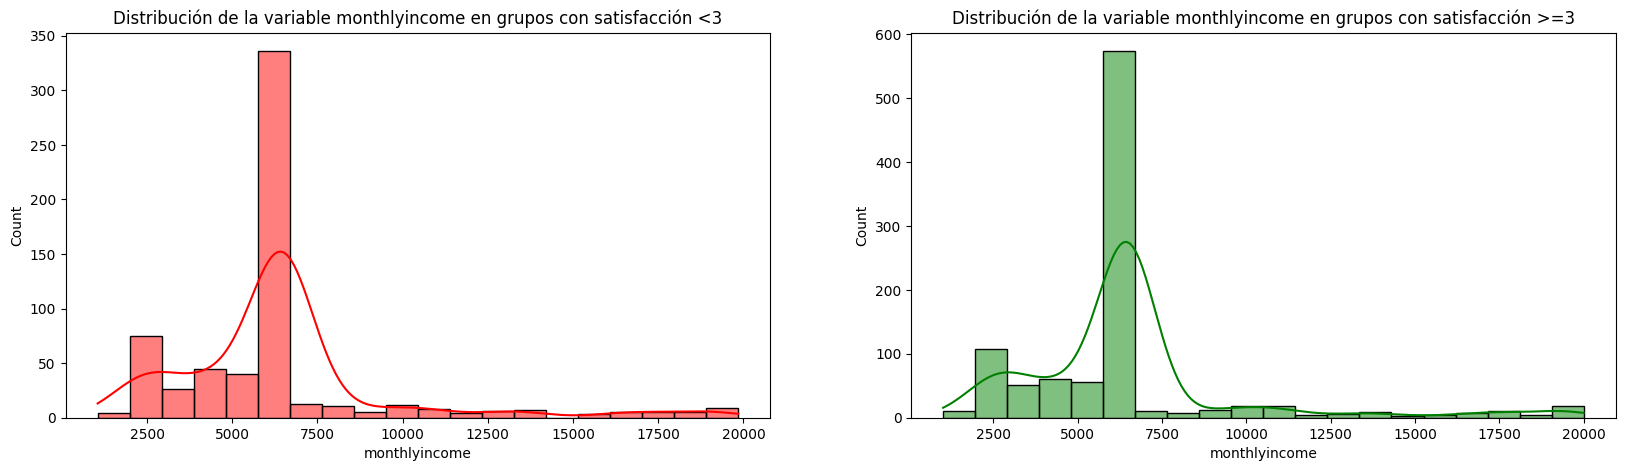

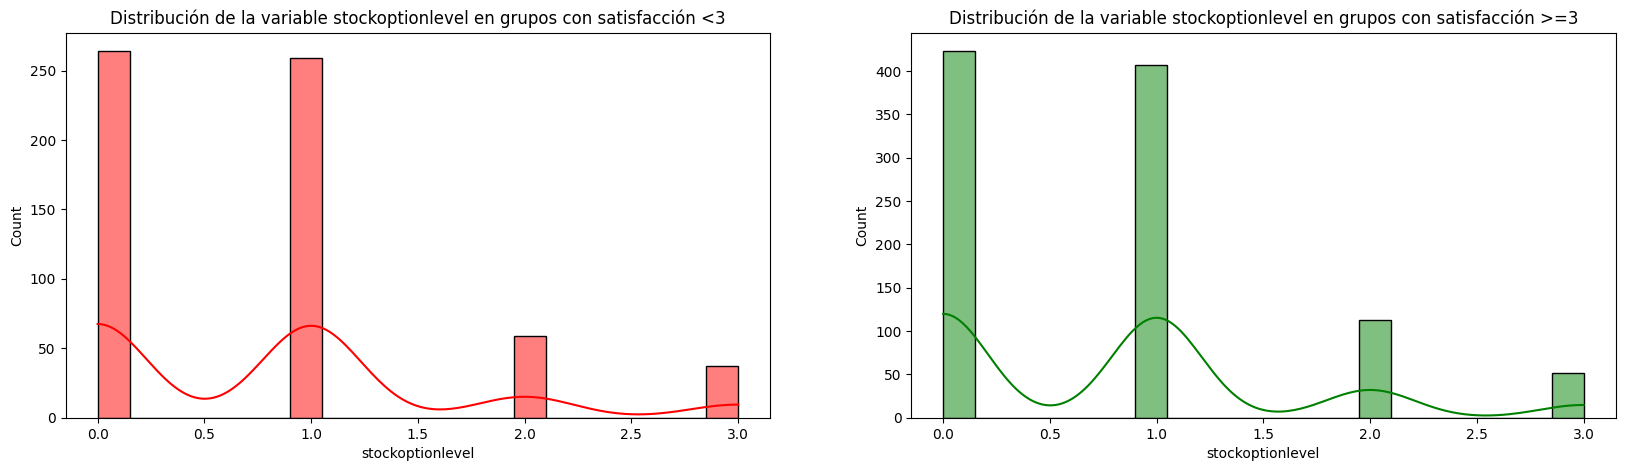

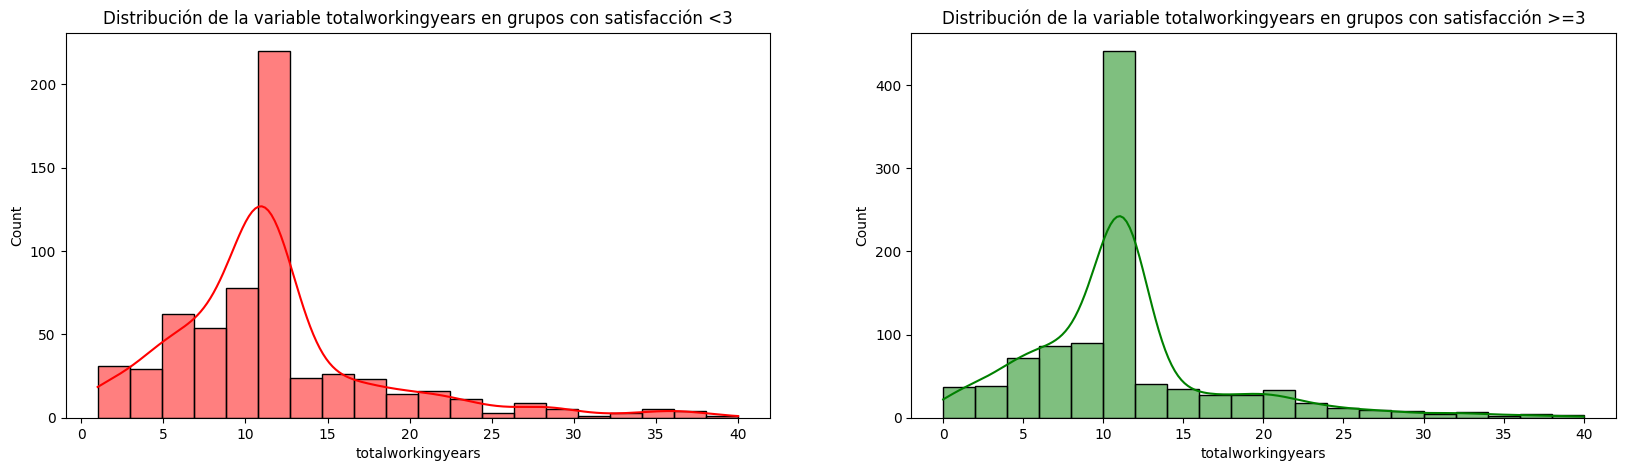

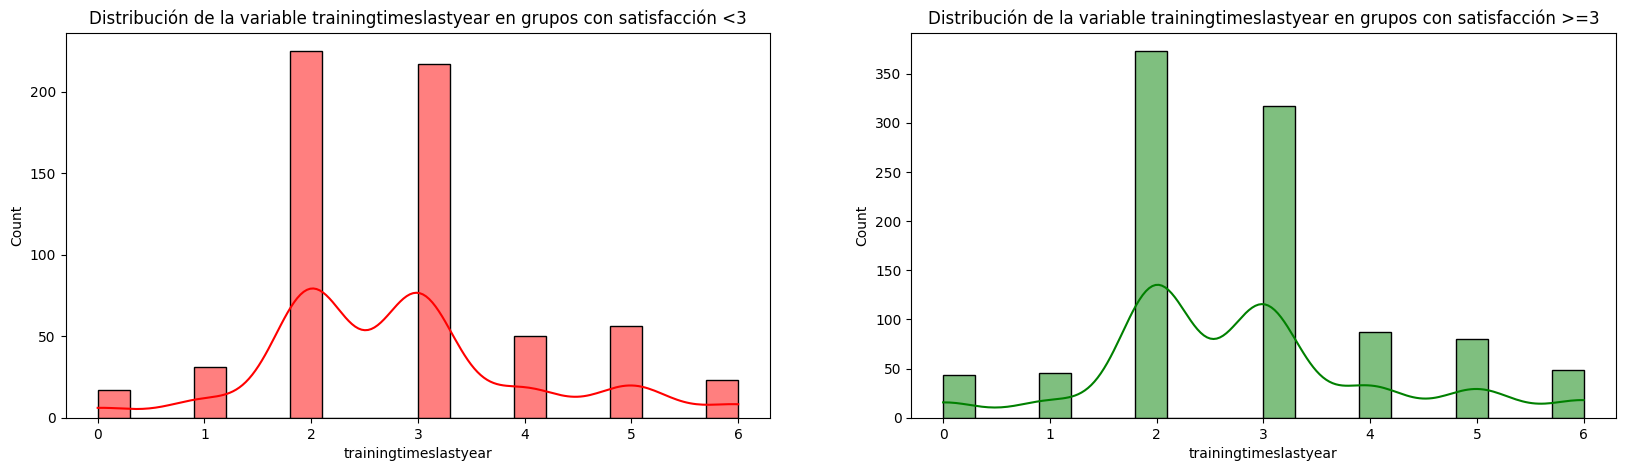

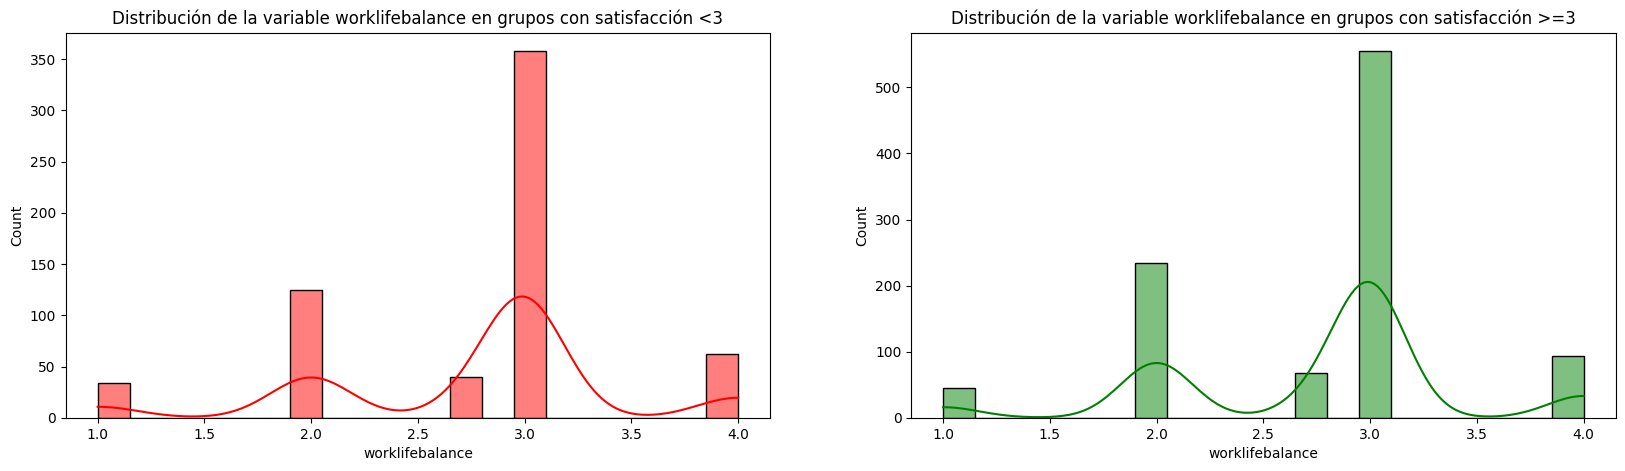

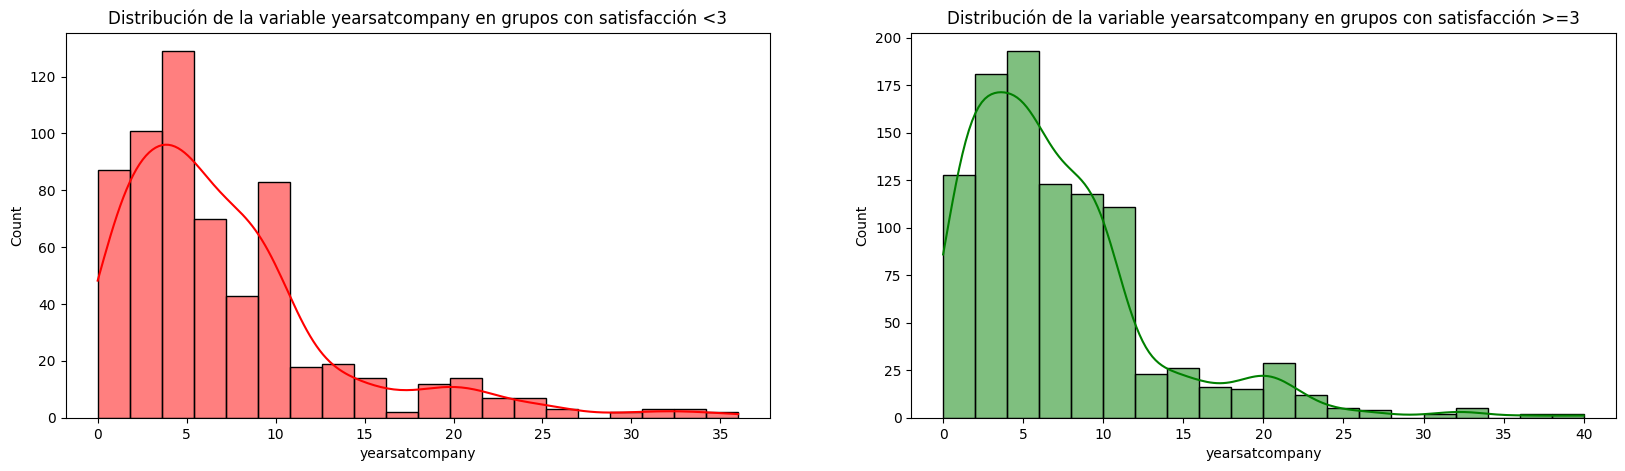

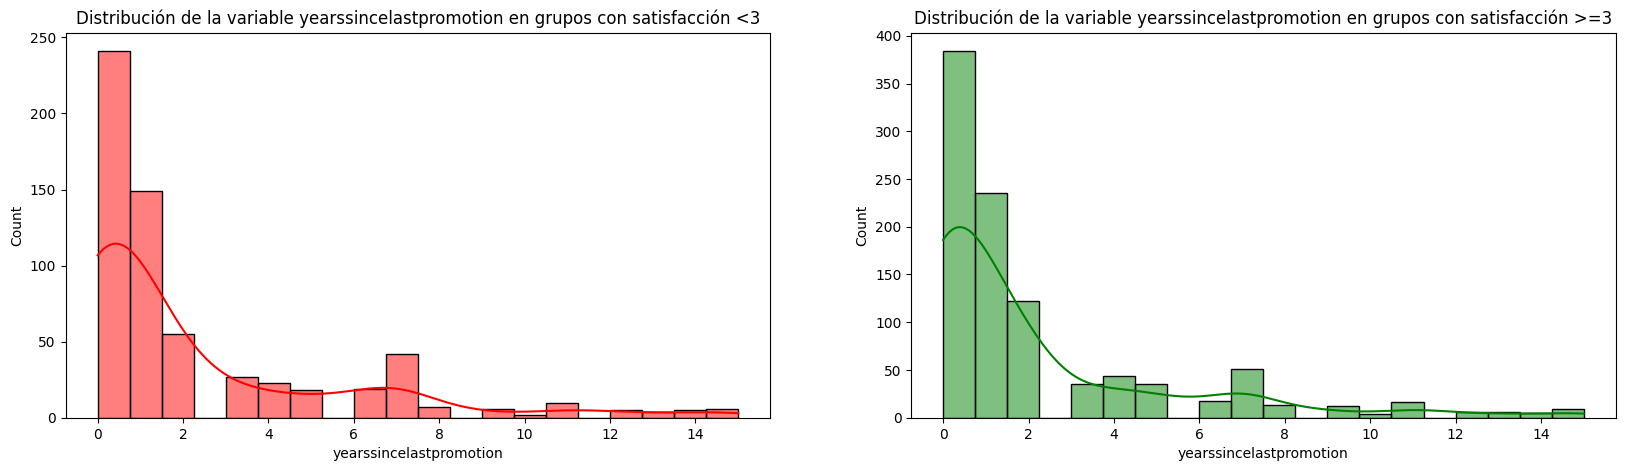

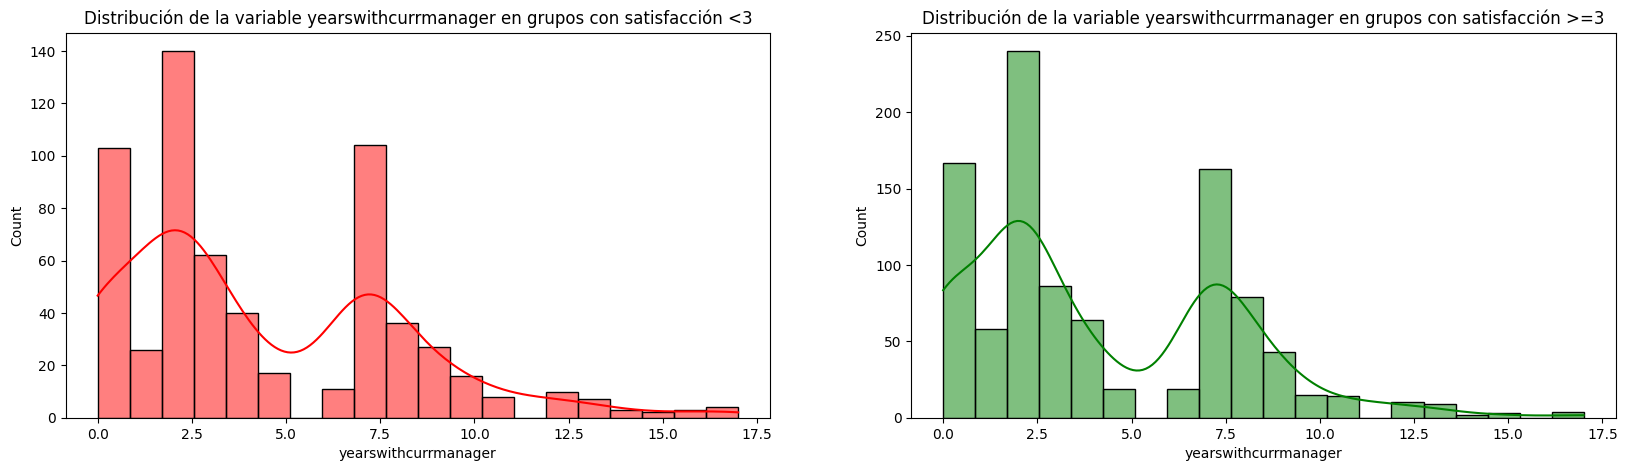

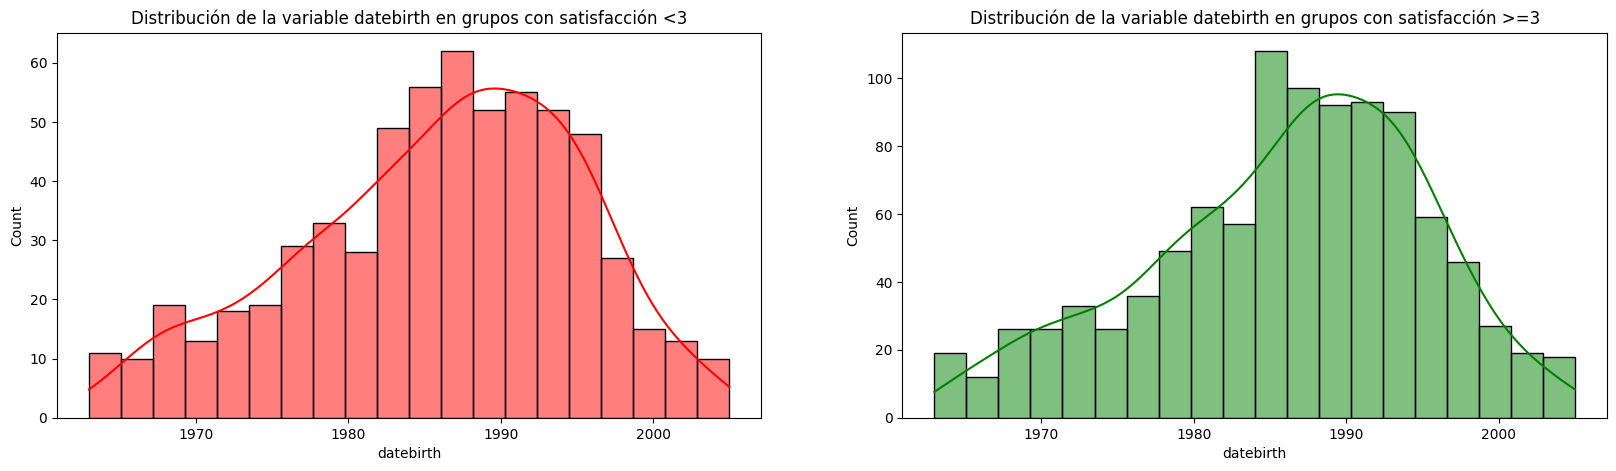

In [64]:
for col in columnas_numericas:
    comparar_variables_numericas_f(df_menor3, df_mayor3, col)

Hacemos lo mismo para las columnas categóricas

In [35]:
def comparar_variables_categoricas (df_izquierda, df_derecha, variable):

    # Recibe dos dataframes y una variable. La función grafica la variable entre los dos grupos analizando.
    # Mostramos la densidad en lugar de la frecuencia para que el tamaño distinto de las diferentes muestras no lleve a equívoco 

    # Crear la figura y el eje 
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5)) 

    # Ordenamos los dataframes 
    df_i = df_izquierda.sort_values(by = variable, ascending = False)
    df_d = df_derecha.sort_values(by = variable, ascending = False)

    sns.histplot(x = variable, 
            data = df_i, 
            color = "orange", 
            stat = 'density',  
            bins = 20,
            ax = axes[0])
    
    
    sns.histplot(x = variable, 
            data = df_d, 
            color = "blue", 
            stat = 'density', 
            bins = 20,
            ax = axes[1])
    

    # Añadimos título 
    axes[0].set_title(f"Distribución de la variable {variable} en grupos con satisfacción <3")
    axes[1].set_title(f"Distribución de la variable {variable} en grupos con satisfacción >=3")

    # cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
    axes[0].set_xlabel(variable)

    # cambiamos el nombre de los ejes usando los métodos
    axes[1].set_xlabel(f"{variable}")

     # Rotar las etiquetas del eje x a 90 grados en gráficos
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)
    ;


In [36]:
columna_excluir = "employeenumber"
columnas_categoricas = df_menor3.describe(include="object").columns.to_list()

columnas_categoricas = [col for col in columnas_categoricas if col != columna_excluir]

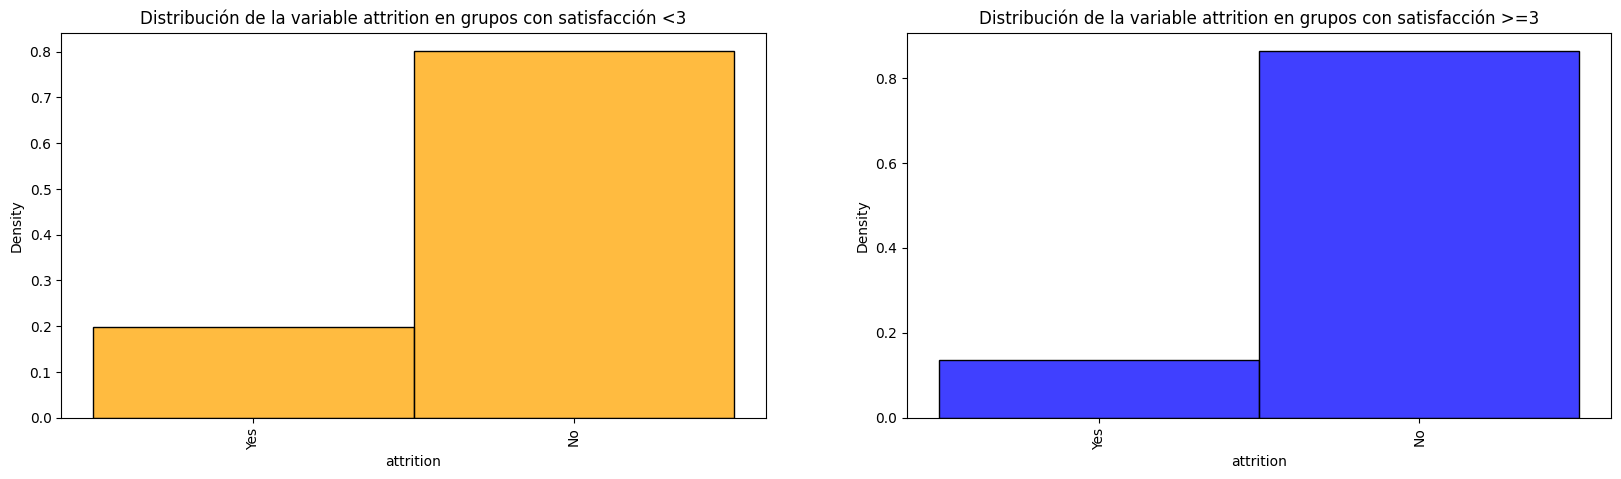

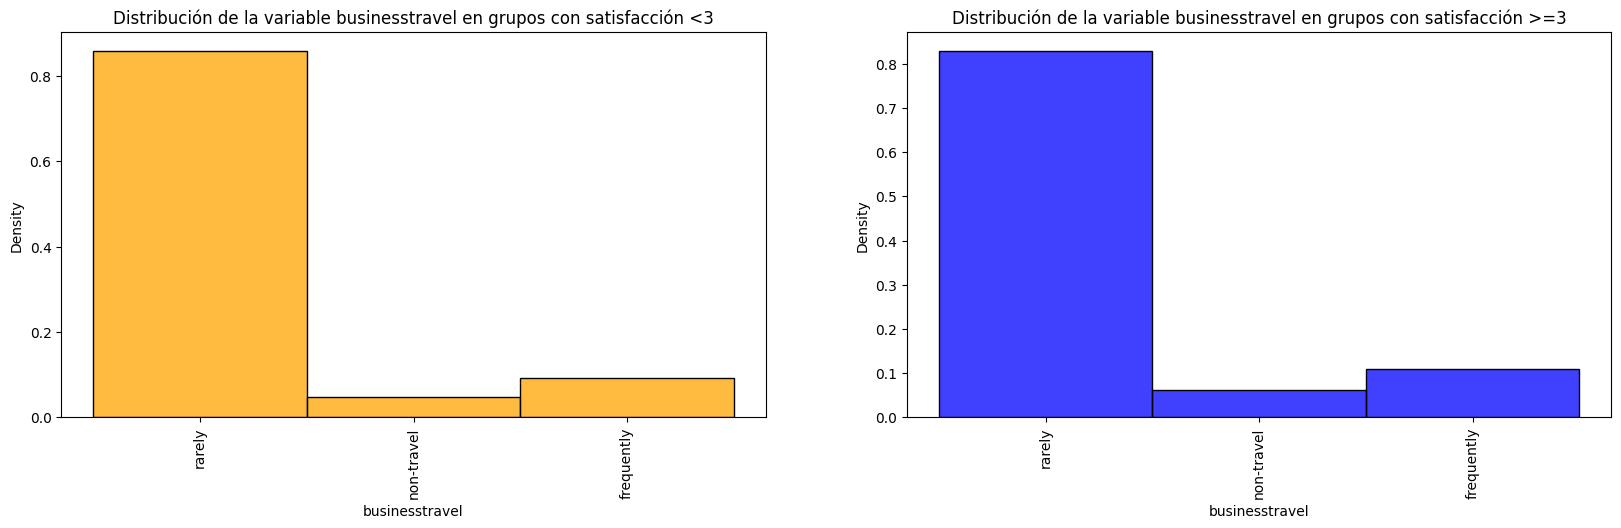

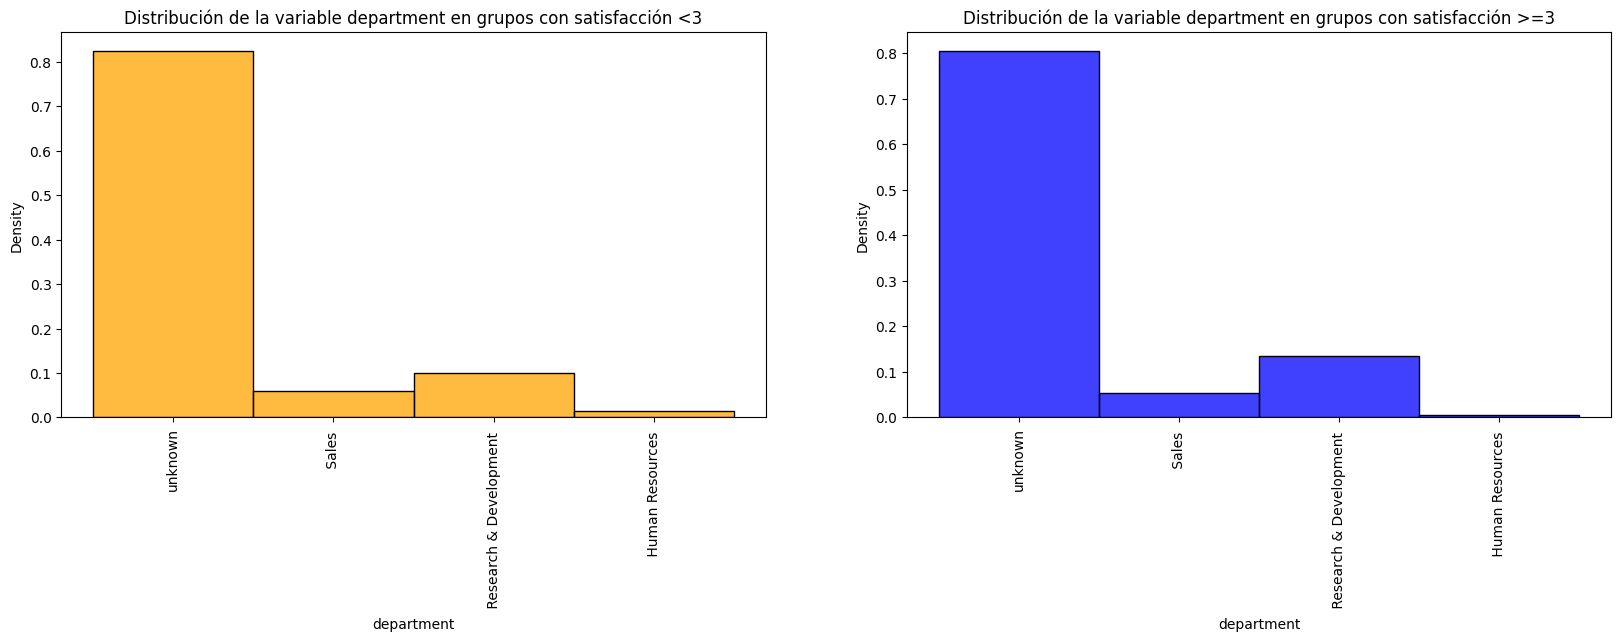

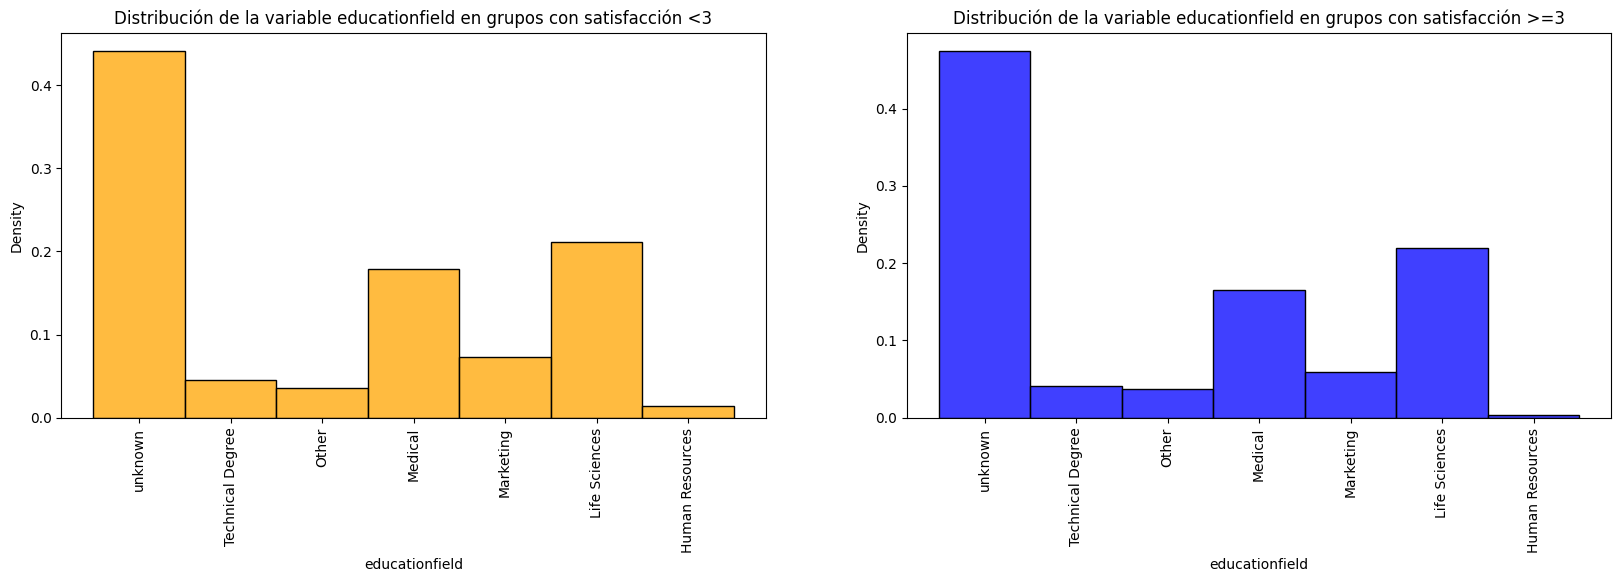

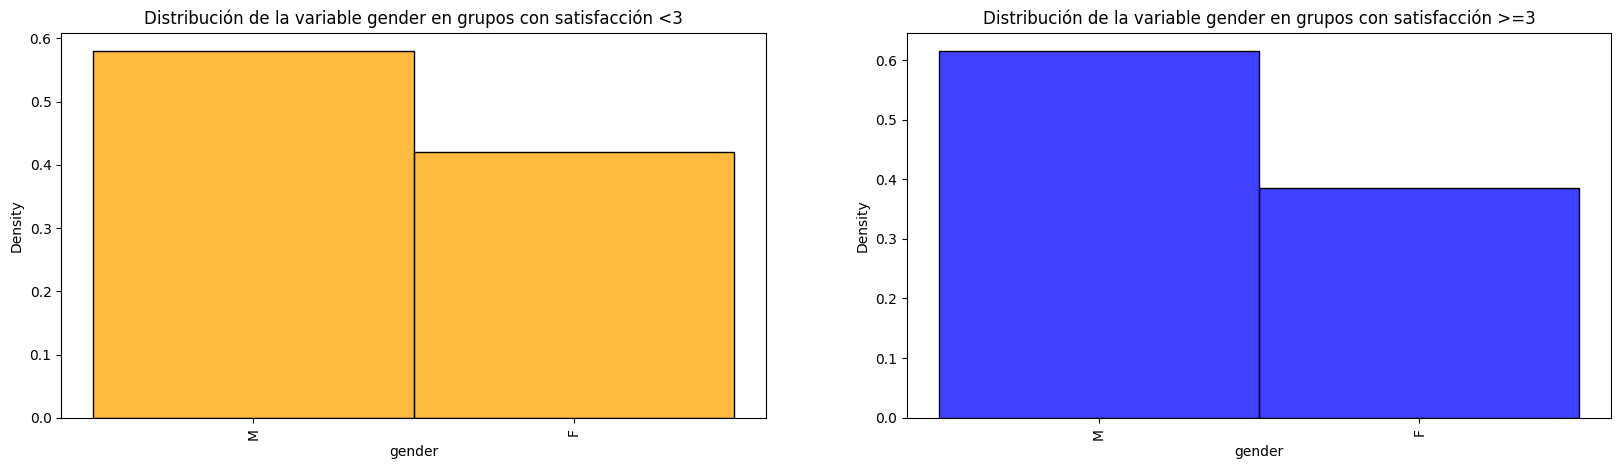

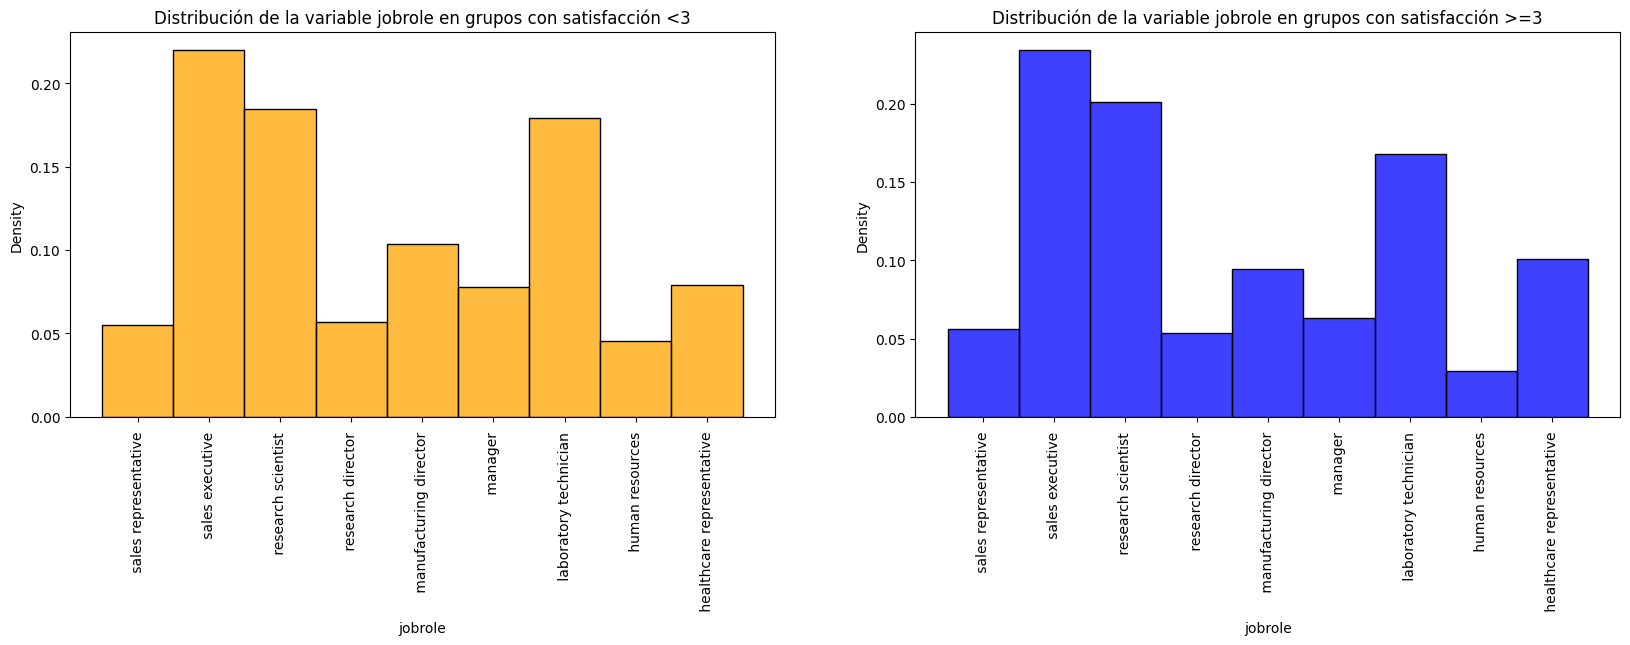

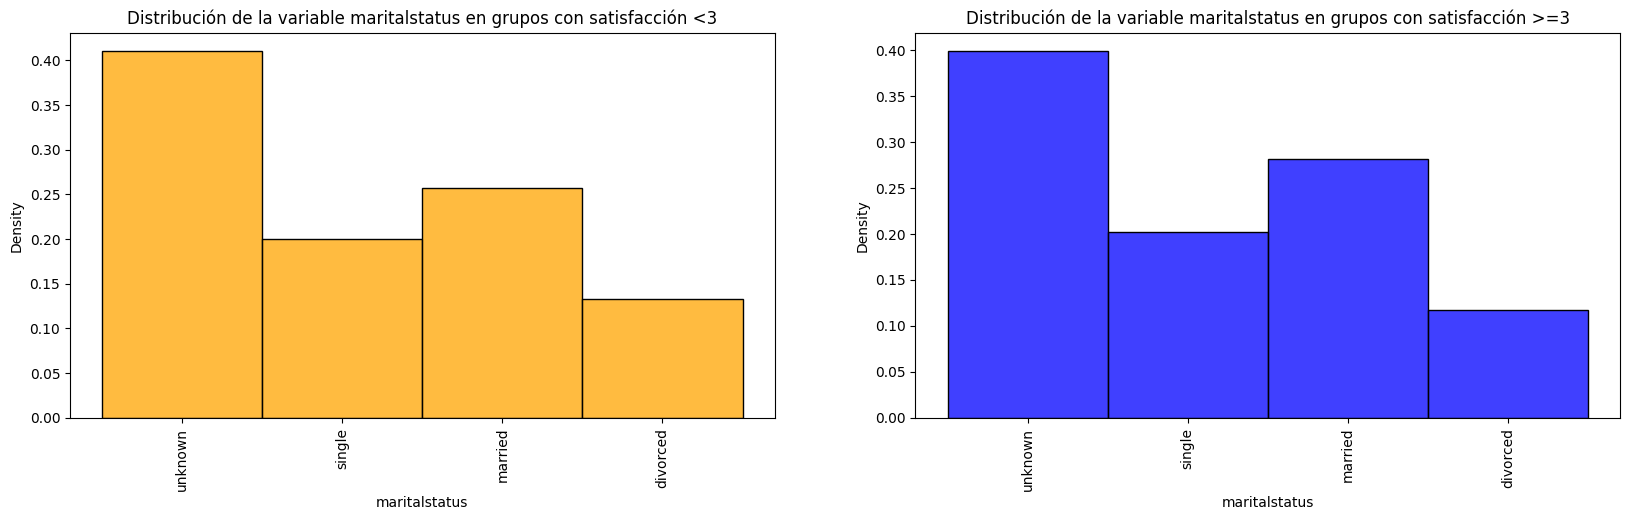

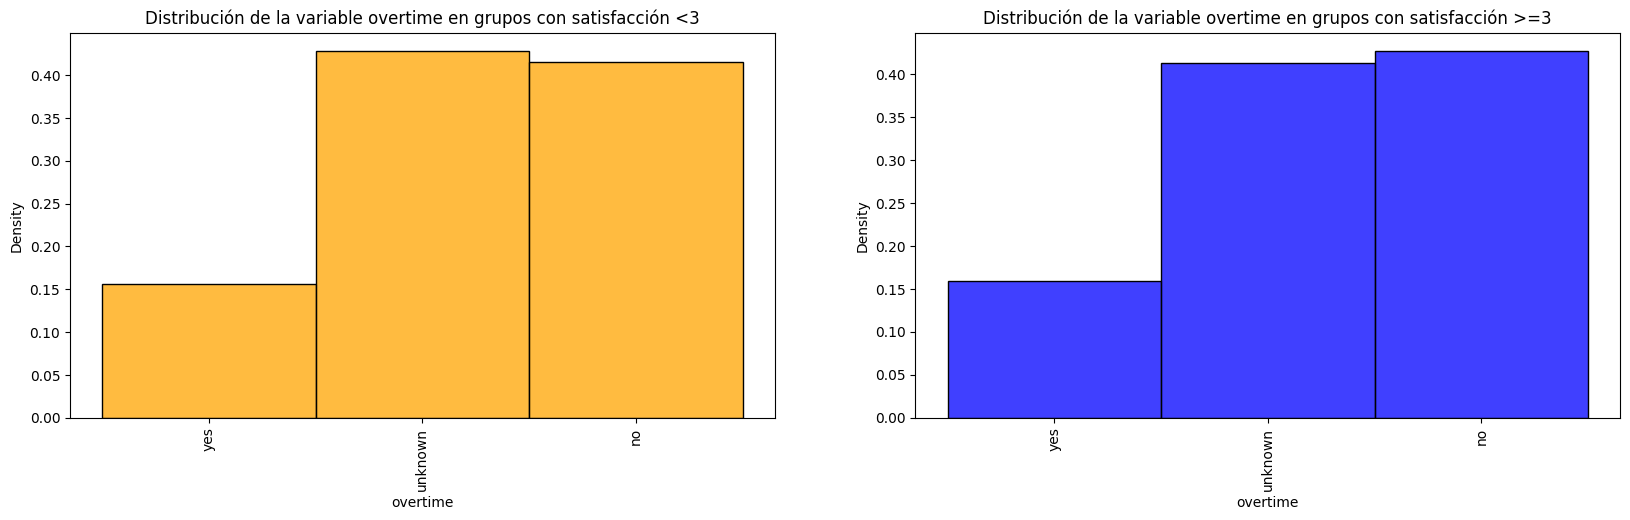

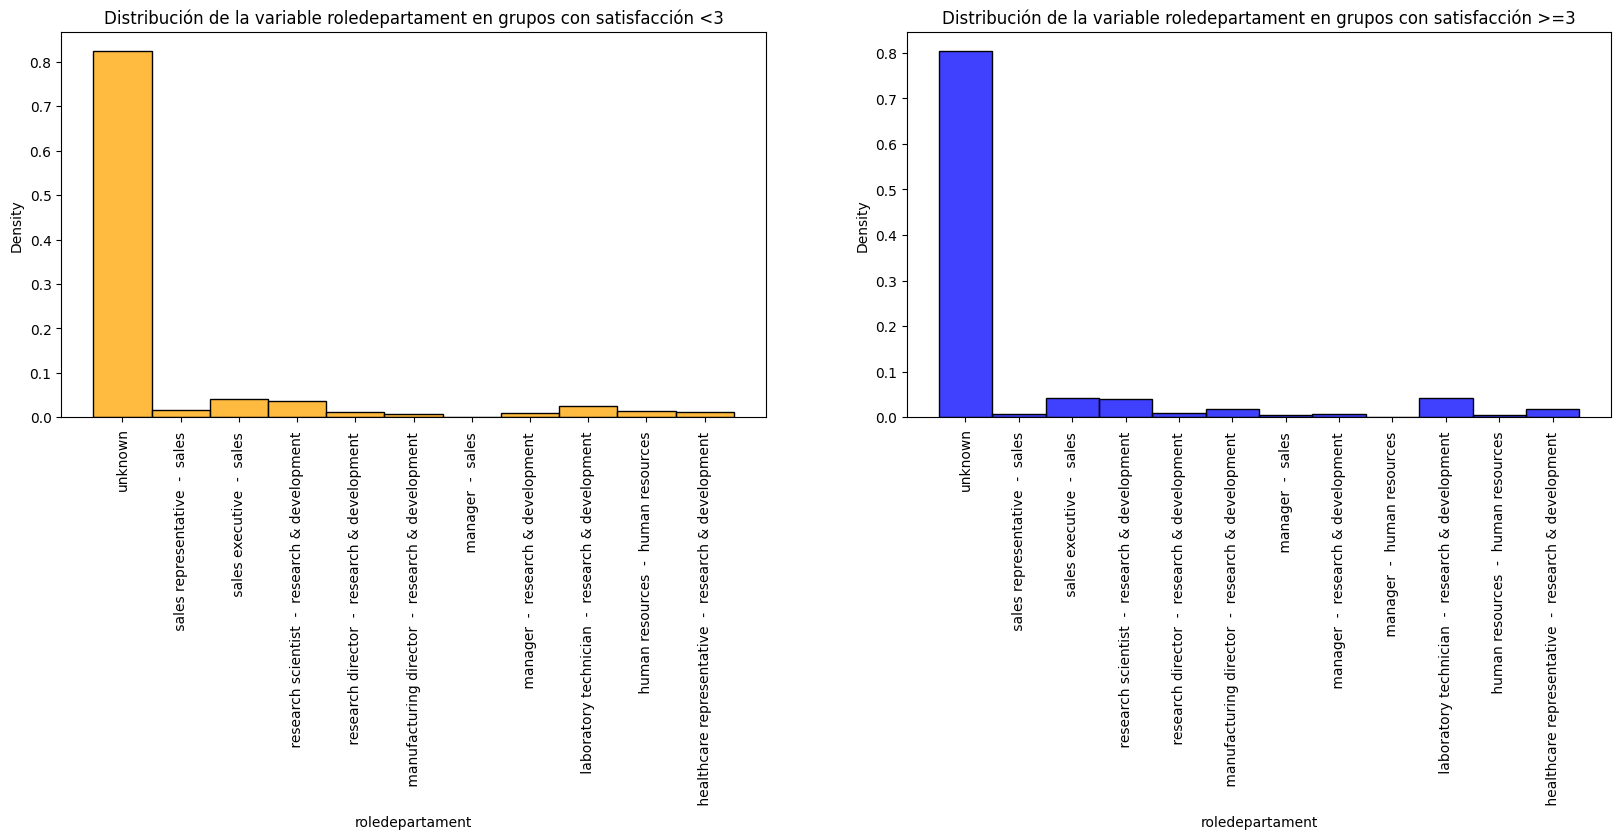

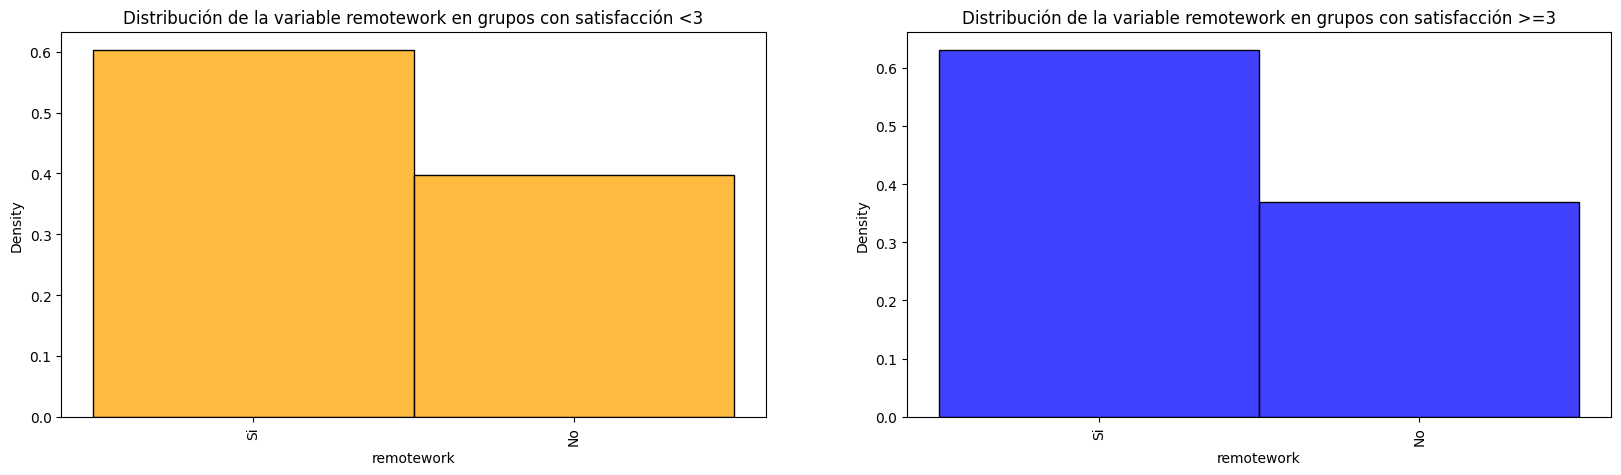

In [37]:
for col in columnas_categoricas:
    comparar_variables_categoricas(df_menor3, df_mayor3, col)

Estudiamos la correlación entre las variables con  'jobsatisfaction'. ¿Alguna tiene correlación fuerte? 

In [38]:
# Estudiamos la correlación entre jobsatisfaction y las variables numéricas del conjunto de datos.

# INDEPENDENCIA

# Visualizar la matriz de correlación con tamaño ajustado
correlacion_matrix = df.corr()
plt.figure(figsize=(20, 15))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

ValueError: could not convert string to float: 'No'

In [39]:
# Análisis de correlaciones entre 'jobsatisfaction' y el resto de variables categóricas. 

In [40]:
df.select_dtypes(include = 'O').columns

Index(['attrition', 'businesstravel', 'department', 'educationfield',
       'employeenumber', 'gender', 'jobrole', 'maritalstatus', 'overtime',
       'roledepartament', 'remotework'],
      dtype='object')

In [41]:
df_categoricas_y_jobsatisfaction = df[['attrition', 'businesstravel', 'department', 'educationfield',
       'employeenumber', 'gender', 'jobrole', 'maritalstatus', 'overtime',
       'roledepartament', 'remotework', 'jobsatisfaction']]
df_categoricas_y_jobsatisfaction.head(5)

,attrition,businesstravel,department,educationfield,employeenumber,gender,jobrole,maritalstatus,overtime,roledepartament,remotework,jobsatisfaction
0,No,rarely,unknown,unknown,162.0,M,research director,unknown,no,unknown,Si,3
1,No,rarely,unknown,Life Sciences,259.0,M,manager,unknown,unknown,unknown,Si,3
2,No,rarely,Research & Development,Technical Degree,319.0,M,manager,married,no,manager - research & development,Si,4
3,No,rarely,unknown,Medical,unknown,F,research director,married,unknown,unknown,No,3
4,No,rarely,unknown,Technical Degree,unknown,F,sales executive,divorced,no,unknown,No,1


In [42]:
df_encoded = df_categoricas_y_jobsatisfaction.copy()

Para poder sacar un mapa de correlación entre jobsatisfaction y el resto de variables categóricas, vamos a convertirlas en categóricas ordinales mediante métodos de la librería LabelEncoder.

In [47]:

le = LabelEncoder()

# Usamos LabelEncoder para las variables categóricas como 'BusinessTravel', 'Gender' y 'Department'
df_encoded['attrition'] = le.fit_transform(df_encoded['attrition'])
df_encoded['businesstravel'] = le.fit_transform(df_encoded['businesstravel'])
df_encoded['department'] = le.fit_transform(df_encoded['department'])
df_encoded['educationfield'] = le.fit_transform(df_encoded['educationfield'])
df_encoded['employeenumber'] = le.fit_transform(df_encoded['employeenumber'])
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
df_encoded['jobrole'] = le.fit_transform(df_encoded['jobrole'])
df_encoded['maritalstatus'] = le.fit_transform(df_encoded['maritalstatus'])
df_encoded['overtime'] = le.fit_transform(df_encoded['overtime'])
df_encoded['roledepartament'] = le.fit_transform(df_encoded['roledepartament'])
df_encoded['remotework'] = le.fit_transform(df_encoded['remotework'])


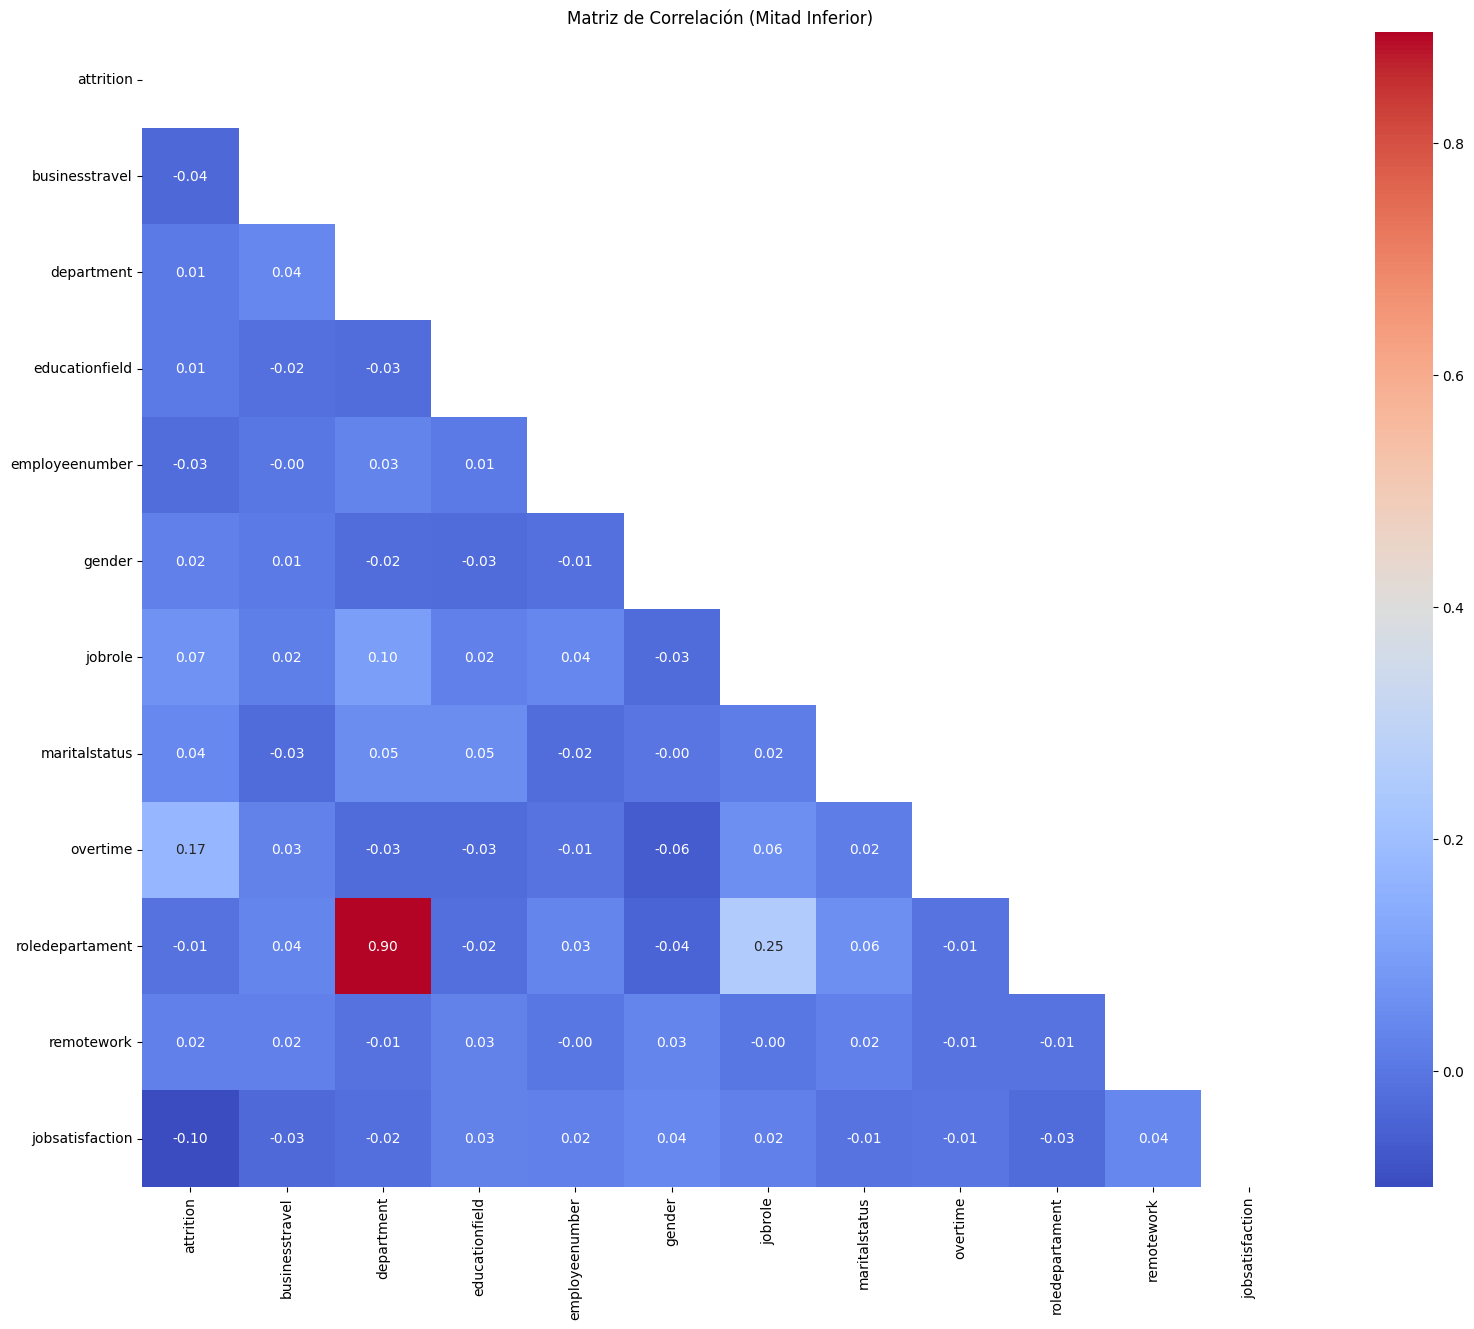

In [48]:
# Crear una máscara para la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el gráfico de calor con la máscara
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación (Mitad Inferior)")
plt.show()

INTERPRETACIÓN DEL ESTUDIO DE LAS VARIABLES CON JOBSATISFACTION No existen relaciones fuertes entre jobsatisfaction y el resto de variables.

----------------------------------------------------------------------------------------------------------------------------

Nos centramos ahora en los trabajadores con satisfacción < 3 que SIGUEN en la empresa. ¿Qué trabajadores de la empresa están ahora en riesgo de rotación? Tenemos las herramientas para buscar un patrón o un perfil de trabajador con probabilidad de rotar. 

In [49]:
df_menor3_plantilla = df[(df['jobsatisfaction']<3) & (df['attrition']=='No')]  # Trabajadores con satisfacción por debajo de 3 (incluye extrabajadores y trabajadores actuales)

CONCLUSIÓN: 496 empleados están en peligro de rotar. Te pasamos el csv al final de la charla. Aunque no tienen todos su id empleado. 

Intentamos buscar un perfil de la gente con jobsatisfaction <3 que sigue en la empresa, pero vemos que sus estadísticos coinciden con los del restro de trabajadores y no podemos llegar a ninguna conclusión nueva.

In [58]:
df_menor3_plantilla.describe()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth
count,496.000000,461.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.0,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,37.856855,782.544469,10.540323,2.921371,2.772177,67.174690,2.808468,2.197581,1.502016,14486.616935,2.802419,14.971774,3.145665,2.784274,40.0,79887.762834,6657.313570,0.862903,12.015545,2.856855,2.783387,7.768145,2.453629,4.681452,1985.133065
std,8.956780,413.684579,10.223877,0.974351,1.070501,19.766086,0.670902,1.125137,0.500501,7017.044818,2.565756,3.582112,0.332463,1.080514,0.0,40327.867818,3360.655652,0.824716,6.634716,1.260781,0.667443,6.438259,3.404968,3.723165,8.952988
min,19.000000,106.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2125.000000,0.000000,11.000000,3.000000,1.000000,40.0,12624.000000,1052.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1963.000000
25%,31.000000,441.000000,2.000000,2.000000,2.000000,51.000000,2.000000,1.000000,1.000000,8507.750000,1.000000,12.000000,3.000000,2.000000,40.0,62517.000000,5209.750000,0.000000,8.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1979.000000
50%,36.000000,760.000000,8.000000,3.000000,3.000000,66.028105,3.000000,2.000000,2.000000,14905.500000,2.000000,14.000000,3.000000,3.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,6.000000,1.000000,3.000000,1987.000000
75%,44.000000,1142.000000,15.000000,4.000000,4.000000,84.000000,3.000000,3.000000,2.000000,20329.750000,4.000000,17.000000,3.000000,4.000000,40.0,77732.233463,6477.686122,1.000000,13.000000,3.000000,3.000000,10.000000,4.000000,7.000000,1992.000000
max,60.000000,1499.000000,49.000000,5.000000,4.000000,100.000000,4.000000,5.000000,2.000000,26914.000000,9.000000,25.000000,4.000000,4.000000,40.0,238164.000000,19847.000000,3.000000,37.000000,6.000000,4.000000,36.000000,15.000000,17.000000,2004.000000


In [59]:
df.describe()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth
count,1614.000000,1490.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,36.920694,802.085235,11.141884,2.925031,2.692069,66.028105,2.739777,2.068154,2.738538,14284.495663,2.673482,15.165428,3.150713,2.704461,40.0,77732.233463,6477.686122,0.791202,11.318934,2.809789,2.759653,7.132590,2.245973,4.220570,1986.076208
std,9.102157,403.246954,10.450560,1.022357,1.107926,19.653316,0.711567,1.101344,1.106163,7110.414585,2.506152,3.648610,0.335654,1.079031,0.0,39516.128943,3293.010745,0.842396,6.343755,1.297765,0.678692,6.124237,3.235665,3.562695,9.101332
min,18.000000,103.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,40.0,12108.000000,1009.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1963.000000
25%,30.000000,468.250000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,8001.000000,1.000000,12.000000,3.000000,2.000000,40.0,60696.000000,5058.000000,0.000000,8.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1980.000000
50%,36.000000,798.000000,8.000000,3.000000,3.000000,66.028105,3.000000,2.000000,3.000000,14248.500000,2.000000,14.000000,3.000000,3.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,5.000000,1.000000,3.000000,1987.000000
75%,43.000000,1157.000000,17.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,20364.000000,4.000000,18.000000,3.150000,4.000000,40.0,77732.233463,6477.686122,1.000000,11.318934,3.000000,3.000000,9.000000,3.000000,7.000000,1993.000000
max,60.000000,1499.000000,49.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.0,239988.000000,19999.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,17.000000,2005.000000


In [60]:
df_menor3_plantilla.describe(include='object')


,attrition,businesstravel,department,educationfield,employeenumber,gender,jobrole,maritalstatus,overtime,roledepartament,remotework
count,496,496,496,496,496,496,496,496,496,496,496
unique,1,3,4,7,333,2,9,4,3,11,2
top,No,rarely,unknown,unknown,unknown,M,sales executive,unknown,no,unknown,Si
freq,496,429,408,221,139,286,108,203,219,408,299


In [62]:
df.describe(include='object')


,attrition,businesstravel,department,educationfield,employeenumber,gender,jobrole,maritalstatus,overtime,roledepartament,remotework
count,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614,1614
unique,2,3,4,7,1080,2,9,4,3,12,2
top,No,rarely,unknown,unknown,unknown,M,sales executive,unknown,no,unknown,Si
freq,1355,1358,1312,745,431,971,369,651,682,1312,1000


-----------------